In [1]:
# Calculation of Flux deposition of particles based on the particles deposition velocity and their concentration (OPC data)
# For this calculation two previously obtained datasets are needed: dry deposition database (output of "DDV script_v12" script, namely "DDV_final.csv")
# and concentration database obtained from OPC data (output of "OPC data analysis" script, namely "Hourly Conc particles.csv")

# Version of this script: v26 (last update: 25/11/2020)
# Author: Nuno Canha

# Remarks: this update focus on creating different outputs and also to replace NaN by zero values, along to create integrated fluxes (test B&B).

In [2]:
# Create a working folder and enter in it:

In [3]:
# 1. Check which is the folder you are on using "pwd"

In [4]:
pwd

'C:\\Users\\Nuno Canha\\Desktop\\Python\\Dry deposition\\Official analysis\\2017 - B&B&OPC'

In [5]:
#2. If you are not in your working folder, enter in it using the command "cd"

In [6]:
cd C:\Users\Nuno Canha\Desktop\Python\Dry deposition\Official analysis\2017 - B&B&OPC

C:\Users\Nuno Canha\Desktop\Python\Dry deposition\Official analysis\2017 - B&B&OPC


In [7]:
# Your raw data file should be "csv" type.
# Upload the analysis packages

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


In [9]:
# Basic x-y plot
# this command is for the graphs to appear in the notebook
%matplotlib inline

In [10]:
# Loading the data
# (Add info about the used weather station)
name = input('Which data is being analised?')

Which data is being analised? 2017 - B&B&OPC


In [11]:
# Upload the dry deposition calculations obtained from the weather data

DDV = pd.read_csv("DDV Calculation_final.csv", delimiter=",", na_values=['0'])

# No values (0) were replaced by NaN in order to not interfere with the analysis

DDV

,Date,T,RH,WS,WD,Year,Month,Day,Hour,ustar,...,vd_11000,vd_13000,vd_15000,vd_16500,vd_0.38-0.54,vd_0.54-1,vd_1-2.1,vd_2.1-5,vd_5-10,vd_>10
0,2017-06-03 02:00:00,-3.635000,74.600000,6.240000,141.033333,2017,6,3,2.0,0.182182,...,0.032143,0.064818,0.132462,0.230090,0.000030,0.000079,0.000245,0.001541,0.009532,0.114878
1,2017-06-03 03:00:00,-4.171667,73.668333,6.263333,138.950000,2017,6,3,3.0,0.182851,...,0.032255,0.065042,0.132913,0.230865,0.000031,0.000079,0.000246,0.001547,0.009566,0.115269
2,2017-06-03 04:00:00,-4.255000,71.785000,6.560000,138.050000,2017,6,3,4.0,0.191494,...,0.030967,0.061431,0.123157,0.210497,0.000031,0.000079,0.000246,0.001539,0.009360,0.106513
3,2017-06-03 05:00:00,-4.631667,71.085000,6.836667,134.300000,2017,6,3,5.0,0.199793,...,0.029989,0.058679,0.115771,0.195217,0.000031,0.000079,0.000246,0.001536,0.009211,0.099914
4,2017-06-03 06:00:00,-4.343333,68.985000,7.131667,138.650000,2017,6,3,6.0,0.208895,...,0.028798,0.055493,0.107548,0.178638,0.000031,0.000079,0.000246,0.001526,0.009004,0.092620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,2017-06-28 21:00:00,1.340000,84.135000,3.091667,137.316667,2017,6,28,21.0,0.106945,...,0.056720,0.145153,0.391690,0.860217,0.000030,0.000077,0.000240,0.001613,0.012808,0.363445
620,2017-06-28 22:00:00,1.051667,84.581667,3.213333,137.783333,2017,6,28,22.0,0.109300,...,0.055142,0.139441,0.371075,0.805424,0.000030,0.000077,0.000241,0.001609,0.012621,0.342770
621,2017-06-28 23:00:00,0.503333,84.873333,3.060000,133.583333,2017,6,28,23.0,0.106339,...,0.058013,0.149472,0.406548,0.898827,0.000030,0.000077,0.000242,0.001625,0.013001,0.378215
622,2017-06-29 00:00:00,-0.116667,85.108333,3.141667,130.400000,2017,6,29,NaN,0.107908,...,0.057309,0.146710,0.396045,0.870066,0.000030,0.000077,0.000243,0.001628,0.012937,0.367533


In [12]:
# Set the timestamp as index:
DDV = DDV.set_index('Date')

DDV['T']=DDV['T'].round(2)
DDV['RH']=DDV['RH'].round(1)
DDV['WS']=DDV['WS'].round(2)

DDV

,T,RH,WS,WD,Year,Month,Day,Hour,ustar,viscair,...,vd_11000,vd_13000,vd_15000,vd_16500,vd_0.38-0.54,vd_0.54-1,vd_1-2.1,vd_2.1-5,vd_5-10,vd_>10
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-03 02:00:00,-3.64,74.6,6.24,141.033333,2017,6,3,2.0,0.182182,0.000013,...,0.032143,0.064818,0.132462,0.230090,0.000030,0.000079,0.000245,0.001541,0.009532,0.114878
2017-06-03 03:00:00,-4.17,73.7,6.26,138.950000,2017,6,3,3.0,0.182851,0.000013,...,0.032255,0.065042,0.132913,0.230865,0.000031,0.000079,0.000246,0.001547,0.009566,0.115269
2017-06-03 04:00:00,-4.26,71.8,6.56,138.050000,2017,6,3,4.0,0.191494,0.000013,...,0.030967,0.061431,0.123157,0.210497,0.000031,0.000079,0.000246,0.001539,0.009360,0.106513
2017-06-03 05:00:00,-4.63,71.1,6.84,134.300000,2017,6,3,5.0,0.199793,0.000013,...,0.029989,0.058679,0.115771,0.195217,0.000031,0.000079,0.000246,0.001536,0.009211,0.099914
2017-06-03 06:00:00,-4.34,69.0,7.13,138.650000,2017,6,3,6.0,0.208895,0.000013,...,0.028798,0.055493,0.107548,0.178638,0.000031,0.000079,0.000246,0.001526,0.009004,0.092620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-28 21:00:00,1.34,84.1,3.09,137.316667,2017,6,28,21.0,0.106945,0.000013,...,0.056720,0.145153,0.391690,0.860217,0.000030,0.000077,0.000240,0.001613,0.012808,0.363445
2017-06-28 22:00:00,1.05,84.6,3.21,137.783333,2017,6,28,22.0,0.109300,0.000013,...,0.055142,0.139441,0.371075,0.805424,0.000030,0.000077,0.000241,0.001609,0.012621,0.342770
2017-06-28 23:00:00,0.50,84.9,3.06,133.583333,2017,6,28,23.0,0.106339,0.000013,...,0.058013,0.149472,0.406548,0.898827,0.000030,0.000077,0.000242,0.001625,0.013001,0.378215


In [13]:
# Upload the concentration values of particles obtained from the OPC data

Conc = pd.read_csv("Hourly Conc particles.csv", delimiter=",", na_values=['0'])

# No values (0) were replaced by NaN in order to not interfere with the analysis

Conc

,Unnamed: 0,C0.46,C0.66,C0.89,C1.15,C1.45,C1.85,C2.55,C3.5,C4.5,C5.75,C7.25,C9,C11,C13,C15,C16.5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Timestamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-06-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-06-11 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-06-11 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,2017-06-28 18:00:00,7.528922e-12,1.368478e-11,4.194556e-11,1.085902e-10,5.441783e-11,1.506923e-10,1.973179e-10,5.102113e-10,5.421925e-10,NaN,NaN,NaN,7.919431e-09,NaN,NaN,NaN
429,2017-06-28 19:00:00,2.302113e-11,2.156065e-11,4.264465e-11,4.882789e-11,5.844878e-11,1.593257e-10,3.495958e-10,4.826323e-10,6.777406e-10,1.721312e-09,2.267410e-09,4.337540e-09,7.919431e-09,NaN,2.008120e-08,NaN
430,2017-06-28 20:00:00,2.771222e-11,2.728403e-11,5.271158e-11,6.047872e-11,7.130612e-11,1.805710e-10,3.222859e-10,5.622737e-10,7.393534e-10,1.663453e-09,2.267410e-09,5.060463e-09,7.919431e-09,1.307212e-08,NaN,NaN
431,2017-06-28 21:00:00,3.069484e-11,2.925711e-11,6.002554e-11,6.880501e-11,7.585516e-11,2.033047e-10,3.659350e-10,4.991198e-10,8.292356e-10,1.445356e-09,2.576602e-09,5.060463e-09,7.919431e-09,1.307212e-08,NaN,NaN


In [14]:
Conc2=Conc.drop(Conc.index[[0,1]])
Conc2

,Unnamed: 0,C0.46,C0.66,C0.89,C1.15,C1.45,C1.85,C2.55,C3.5,C4.5,C5.75,C7.25,C9,C11,C13,C15,C16.5
2,2017-06-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-06-11 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-06-11 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2017-06-11 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2017-06-11 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,2017-06-28 18:00:00,7.528922e-12,1.368478e-11,4.194556e-11,1.085902e-10,5.441783e-11,1.506923e-10,1.973179e-10,5.102113e-10,5.421925e-10,NaN,NaN,NaN,7.919431e-09,NaN,NaN,NaN
429,2017-06-28 19:00:00,2.302113e-11,2.156065e-11,4.264465e-11,4.882789e-11,5.844878e-11,1.593257e-10,3.495958e-10,4.826323e-10,6.777406e-10,1.721312e-09,2.267410e-09,4.337540e-09,7.919431e-09,NaN,2.008120e-08,NaN
430,2017-06-28 20:00:00,2.771222e-11,2.728403e-11,5.271158e-11,6.047872e-11,7.130612e-11,1.805710e-10,3.222859e-10,5.622737e-10,7.393534e-10,1.663453e-09,2.267410e-09,5.060463e-09,7.919431e-09,1.307212e-08,NaN,NaN
431,2017-06-28 21:00:00,3.069484e-11,2.925711e-11,6.002554e-11,6.880501e-11,7.585516e-11,2.033047e-10,3.659350e-10,4.991198e-10,8.292356e-10,1.445356e-09,2.576602e-09,5.060463e-09,7.919431e-09,1.307212e-08,NaN,NaN


In [15]:
Conc2.rename(columns={'Unnamed: 0':'Date'},inplace=True)
Conc2

,Date,C0.46,C0.66,C0.89,C1.15,C1.45,C1.85,C2.55,C3.5,C4.5,C5.75,C7.25,C9,C11,C13,C15,C16.5
2,2017-06-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-06-11 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-06-11 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2017-06-11 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2017-06-11 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,2017-06-28 18:00:00,7.528922e-12,1.368478e-11,4.194556e-11,1.085902e-10,5.441783e-11,1.506923e-10,1.973179e-10,5.102113e-10,5.421925e-10,NaN,NaN,NaN,7.919431e-09,NaN,NaN,NaN
429,2017-06-28 19:00:00,2.302113e-11,2.156065e-11,4.264465e-11,4.882789e-11,5.844878e-11,1.593257e-10,3.495958e-10,4.826323e-10,6.777406e-10,1.721312e-09,2.267410e-09,4.337540e-09,7.919431e-09,NaN,2.008120e-08,NaN
430,2017-06-28 20:00:00,2.771222e-11,2.728403e-11,5.271158e-11,6.047872e-11,7.130612e-11,1.805710e-10,3.222859e-10,5.622737e-10,7.393534e-10,1.663453e-09,2.267410e-09,5.060463e-09,7.919431e-09,1.307212e-08,NaN,NaN
431,2017-06-28 21:00:00,3.069484e-11,2.925711e-11,6.002554e-11,6.880501e-11,7.585516e-11,2.033047e-10,3.659350e-10,4.991198e-10,8.292356e-10,1.445356e-09,2.576602e-09,5.060463e-09,7.919431e-09,1.307212e-08,NaN,NaN


In [16]:
# Set the timestamp as index:
Conc2 = Conc2.set_index('Date')
Conc2

,C0.46,C0.66,C0.89,C1.15,C1.45,C1.85,C2.55,C3.5,C4.5,C5.75,C7.25,C9,C11,C13,C15,C16.5
Date,,,,,,,,,,,,,,,,
2017-06-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-28 18:00:00,7.528922e-12,1.368478e-11,4.194556e-11,1.085902e-10,5.441783e-11,1.506923e-10,1.973179e-10,5.102113e-10,5.421925e-10,NaN,NaN,NaN,7.919431e-09,NaN,NaN,NaN
2017-06-28 19:00:00,2.302113e-11,2.156065e-11,4.264465e-11,4.882789e-11,5.844878e-11,1.593257e-10,3.495958e-10,4.826323e-10,6.777406e-10,1.721312e-09,2.267410e-09,4.337540e-09,7.919431e-09,NaN,2.008120e-08,NaN
2017-06-28 20:00:00,2.771222e-11,2.728403e-11,5.271158e-11,6.047872e-11,7.130612e-11,1.805710e-10,3.222859e-10,5.622737e-10,7.393534e-10,1.663453e-09,2.267410e-09,5.060463e-09,7.919431e-09,1.307212e-08,NaN,NaN


In [17]:
# Check the shapes of our datasets
Conc2.shape

(431, 16)

In [18]:
DDV.shape

(624, 53)

In [19]:
data = pd.merge(DDV, Conc2, on='Date')
data

,T,RH,WS,WD,Year,Month,Day,Hour,ustar,viscair,...,C2.55,C3.5,C4.5,C5.75,C7.25,C9,C11,C13,C15,C16.5
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-11 00:00:00,1.62,74.0,6.91,154.816667,2017,6,11,NaN,0.202133,0.000013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 01:00:00,1.80,71.6,8.38,163.183333,2017,6,11,1.0,0.250299,0.000013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 02:00:00,1.61,70.8,7.77,170.683333,2017,6,11,2.0,0.229427,0.000013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 03:00:00,1.50,71.6,7.98,170.100000,2017,6,11,3.0,0.236523,0.000013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 04:00:00,1.03,75.4,8.63,168.750000,2017,6,11,4.0,0.259093,0.000013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-28 18:00:00,1.46,84.6,3.04,137.750000,2017,6,28,18.0,0.105927,0.000013,...,1.973179e-10,5.102113e-10,5.421925e-10,NaN,NaN,NaN,7.919431e-09,NaN,NaN,NaN
2017-06-28 19:00:00,1.40,84.6,3.00,131.283333,2017,6,28,19.0,0.105263,0.000013,...,3.495958e-10,4.826323e-10,6.777406e-10,1.721312e-09,2.267410e-09,4.337540e-09,7.919431e-09,NaN,2.008120e-08,NaN
2017-06-28 20:00:00,1.46,84.1,3.08,132.950000,2017,6,28,20.0,0.106785,0.000013,...,3.222859e-10,5.622737e-10,7.393534e-10,1.663453e-09,2.267410e-09,5.060463e-09,7.919431e-09,1.307212e-08,NaN,NaN


In [20]:
# Calculation of the flux of particles deposition using the equation by Jim et al. (1994), where the 
# Flux (microg.m2.s-1) is the dry deposition velocity at bin i (m.s-1) x Concentrations of particles at bin i (microg.m-3)

In [21]:
data['F0.46']=data['vd_460']*data['C0.46'] 
data['F0.66']=data['vd_660']*data['C0.66']
data['F0.89']=data['vd_890']*data['C0.89'] 
data['F1.15']=data['vd_1150']*data['C1.15'] 
data['F1.45']=data['vd_1450']*data['C1.45'] 
data['F1.85']=data['vd_1850']*data['C1.85'] 
data['F2.55']=data['vd_2550']*data['C2.55'] 
data['F3.5']=data['vd_3500']*data['C3.5'] 
data['F4.5']=data['vd_4500']*data['C4.5']
data['F5.75']=data['vd_5750']*data['C5.75']
data['F7.25']=data['vd_7250']*data['C7.25'] 
data['F9']=data['vd_9000']*data['C9']
data['F11']=data['vd_11000']*data['C11']
data['F13']=data['vd_13000']*data['C13']
data['F15']=data['vd_15000']*data['C15']
data['F16.5']=data['vd_16500']*data['C16.5']

Flux = data[['T','RH','WS','WD', 'Year', 'Month','Day', 'Hour','F0.46','F0.66','F0.89','F1.15', 'F1.45','F1.85','F2.55','F3.5','F4.5', 'F5.75','F7.25','F9','F11','F13','F15','F16.5']]
Flux

,T,RH,WS,WD,Year,Month,Day,Hour,F0.46,F0.66,...,F2.55,F3.5,F4.5,F5.75,F7.25,F9,F11,F13,F15,F16.5
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-11 00:00:00,1.62,74.0,6.91,154.816667,2017,6,11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 01:00:00,1.80,71.6,8.38,163.183333,2017,6,11,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 02:00:00,1.61,70.8,7.77,170.683333,2017,6,11,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 03:00:00,1.50,71.6,7.98,170.100000,2017,6,11,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-11 04:00:00,1.03,75.4,8.63,168.750000,2017,6,11,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-28 18:00:00,1.46,84.6,3.04,137.750000,2017,6,28,18.0,2.230789e-16,7.688210e-16,...,1.418552e-13,7.434516e-13,1.445984e-12,NaN,NaN,NaN,4.549261e-10,NaN,NaN,NaN
2017-06-28 19:00:00,1.40,84.6,3.00,131.283333,2017,6,28,19.0,6.823493e-16,1.211768e-15,...,2.515679e-13,7.042746e-13,1.811310e-12,8.851004e-12,2.379620e-11,1.009871e-10,4.598222e-10,NaN,8.218134e-09,NaN
2017-06-28 20:00:00,1.46,84.1,3.08,132.950000,2017,6,28,20.0,8.211003e-16,1.532795e-15,...,2.315508e-13,8.183182e-13,1.967795e-12,8.497680e-12,2.355480e-11,1.160039e-10,4.493641e-10,1.899055e-09,NaN,NaN


In [22]:
# To save the dataset with Flux calculations:

selection = Flux

output_selection = 'Flux values.csv'

# Save dataframe to csv
selection.to_csv(output_selection, sep=',', index = True)


In [23]:
# Select a specific time period to analysis (it should be the one where OPC data exists), if it is needed

Flux1=Flux[(Flux.index > '2017-06-11 12:00:00')]
Flux2 =Flux1
# the time period selected is exactly the one that already exists


In [24]:
Flux2['F0.38-0.54']=Flux['F0.46'].fillna(0)
Flux2['F0.54-1']=Flux2['F0.66'].fillna(0)+Flux2['F0.89'].fillna(0)
Flux2['F1-2.1']=Flux2['F1.15'].fillna(0)+Flux2['F1.45'].fillna(0)+Flux2['F1.85'].fillna(0) 
Flux2['F2.1-5']=Flux2['F2.55'].fillna(0)+Flux2['F3.5'].fillna(0)+Flux2['F4.5'].fillna(0) 
Flux2['F5-10']=Flux2['F5.75'].fillna(0)+Flux2['F7.25'].fillna(0)+Flux2['F9'].fillna(0) 
Flux2['F>10']=Flux2['F11'].fillna(0)+Flux2['F13'].fillna(0)+Flux2['F15'].fillna(0)+Flux2['F16.5'].fillna(0)

# To compute the graphs of the flux
Flux2

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

,T,RH,WS,WD,Year,Month,Day,Hour,F0.46,F0.66,...,F11,F13,F15,F16.5,F0.38-0.54,F0.54-1,F1-2.1,F2.1-5,F5-10,F>10
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-11 13:00:00,1.84,77.9,5.47,147.916667,2017,6,11,13.0,4.764118e-16,9.156148e-16,...,NaN,NaN,NaN,NaN,4.764118e-16,3.115405e-15,2.799421e-14,6.876516e-14,0.000000e+00,0.000000e+00
2017-06-11 14:00:00,2.17,74.5,5.59,158.900000,2017,6,11,14.0,5.578463e-16,8.967819e-16,...,2.611058e-10,8.912897e-10,NaN,NaN,5.578463e-16,3.178677e-15,3.636223e-14,1.935226e-12,9.255053e-11,1.152396e-09
2017-06-11 15:00:00,2.13,75.1,5.72,157.450000,2017,6,11,15.0,4.566265e-16,8.253659e-16,...,NaN,8.667371e-10,2.776097e-09,NaN,4.566265e-16,3.056529e-15,3.811370e-14,1.955604e-12,9.200438e-11,3.642834e-09
2017-06-11 16:00:00,2.28,74.2,5.04,159.716667,2017,6,11,16.0,4.830887e-16,8.788351e-16,...,3.579291e-10,1.014168e-09,3.422921e-09,NaN,4.830887e-16,3.110083e-15,3.330069e-14,2.170581e-12,1.060985e-10,4.795018e-09
2017-06-11 17:00:00,2.08,75.0,4.87,164.383333,2017,6,11,17.0,4.026239e-16,7.964962e-16,...,2.962608e-10,1.063006e-09,NaN,NaN,4.026239e-16,3.003758e-15,3.064191e-14,1.857607e-12,1.009142e-10,1.359267e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-28 18:00:00,1.46,84.6,3.04,137.750000,2017,6,28,18.0,2.230789e-16,7.688210e-16,...,4.549261e-10,NaN,NaN,NaN,2.230789e-16,4.847074e-15,8.165407e-14,2.331291e-12,0.000000e+00,4.549261e-10
2017-06-28 19:00:00,1.40,84.6,3.00,131.283333,2017,6,28,19.0,6.823493e-16,1.211768e-15,...,4.598222e-10,NaN,8.218134e-09,NaN,6.823493e-16,5.359797e-15,7.755082e-14,2.767152e-12,1.336343e-10,8.677956e-09
2017-06-28 20:00:00,1.46,84.1,3.08,132.950000,2017,6,28,20.0,8.211003e-16,1.532795e-15,...,4.493641e-10,1.899055e-09,NaN,NaN,8.211003e-16,6.657458e-15,8.962691e-14,3.017664e-12,1.480564e-10,2.348420e-09


In [25]:
selection2 = Flux2

output_selection2 = 'Flux values_corrected.csv'

# Save dataframe to csv
selection2.to_csv(output_selection2, sep=',', index = True)


Flux2 = pd.read_csv("Flux values_corrected.csv", delimiter=",", na_values=['0'])

Flux2=Flux2.set_index('Date')
Flux2

,T,RH,WS,WD,Year,Month,Day,Hour,F0.46,F0.66,...,F11,F13,F15,F16.5,F0.38-0.54,F0.54-1,F1-2.1,F2.1-5,F5-10,F>10
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-11 13:00:00,1.84,77.9,5.47,147.916667,2017,6,11,13.0,4.764118e-16,9.156148e-16,...,NaN,NaN,NaN,NaN,4.764118e-16,3.115405e-15,2.799421e-14,6.876516e-14,NaN,NaN
2017-06-11 14:00:00,2.17,74.5,5.59,158.900000,2017,6,11,14.0,5.578463e-16,8.967819e-16,...,2.611058e-10,8.912897e-10,NaN,NaN,5.578463e-16,3.178677e-15,3.636223e-14,1.935226e-12,9.255053e-11,1.152396e-09
2017-06-11 15:00:00,2.13,75.1,5.72,157.450000,2017,6,11,15.0,4.566265e-16,8.253659e-16,...,NaN,8.667371e-10,2.776097e-09,NaN,4.566265e-16,3.056529e-15,3.811370e-14,1.955604e-12,9.200438e-11,3.642834e-09
2017-06-11 16:00:00,2.28,74.2,5.04,159.716667,2017,6,11,16.0,4.830887e-16,8.788351e-16,...,3.579291e-10,1.014168e-09,3.422921e-09,NaN,4.830887e-16,3.110083e-15,3.330069e-14,2.170581e-12,1.060985e-10,4.795018e-09
2017-06-11 17:00:00,2.08,75.0,4.87,164.383333,2017,6,11,17.0,4.026239e-16,7.964962e-16,...,2.962608e-10,1.063006e-09,NaN,NaN,4.026239e-16,3.003758e-15,3.064191e-14,1.857607e-12,1.009142e-10,1.359267e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-28 18:00:00,1.46,84.6,3.04,137.750000,2017,6,28,18.0,2.230789e-16,7.688210e-16,...,4.549261e-10,NaN,NaN,NaN,2.230789e-16,4.847074e-15,8.165407e-14,2.331291e-12,NaN,4.549261e-10
2017-06-28 19:00:00,1.40,84.6,3.00,131.283333,2017,6,28,19.0,6.823493e-16,1.211768e-15,...,4.598222e-10,NaN,8.218134e-09,NaN,6.823493e-16,5.359797e-15,7.755082e-14,2.767152e-12,1.336343e-10,8.677956e-09
2017-06-28 20:00:00,1.46,84.1,3.08,132.950000,2017,6,28,20.0,8.211003e-16,1.532795e-15,...,4.493641e-10,1.899055e-09,NaN,NaN,8.211003e-16,6.657458e-15,8.962691e-14,3.017664e-12,1.480564e-10,2.348420e-09


In [26]:
# Transform the database in a proper design to plot the graphs:

Flux3=Flux2.rename(columns = {'F0.38-0.54':'0.38-0.54','F0.54-1':'0.54-1','F1-2.1':'1-2.1','F2.1-5':'2.1-5','F5-10':'5-10','F>10':'>10','F0.46':'0.46','F0.66':'0.66','F0.89':'0.89','F1.15':'1.15','F1.45':'1.45','F1.85':'1.85','F2.55':'2.55','F3.5':'3.5','F4.5':'4.5','F5.75':'5.75','F7.25':'7.25','F9':'9','F11':'11','F13':'13','F15':'15', 'F16.5':'16.5'})
Flux3

,T,RH,WS,WD,Year,Month,Day,Hour,0.46,0.66,...,11,13,15,16.5,0.38-0.54,0.54-1,1-2.1,2.1-5,5-10,>10
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-11 13:00:00,1.84,77.9,5.47,147.916667,2017,6,11,13.0,4.764118e-16,9.156148e-16,...,NaN,NaN,NaN,NaN,4.764118e-16,3.115405e-15,2.799421e-14,6.876516e-14,NaN,NaN
2017-06-11 14:00:00,2.17,74.5,5.59,158.900000,2017,6,11,14.0,5.578463e-16,8.967819e-16,...,2.611058e-10,8.912897e-10,NaN,NaN,5.578463e-16,3.178677e-15,3.636223e-14,1.935226e-12,9.255053e-11,1.152396e-09
2017-06-11 15:00:00,2.13,75.1,5.72,157.450000,2017,6,11,15.0,4.566265e-16,8.253659e-16,...,NaN,8.667371e-10,2.776097e-09,NaN,4.566265e-16,3.056529e-15,3.811370e-14,1.955604e-12,9.200438e-11,3.642834e-09
2017-06-11 16:00:00,2.28,74.2,5.04,159.716667,2017,6,11,16.0,4.830887e-16,8.788351e-16,...,3.579291e-10,1.014168e-09,3.422921e-09,NaN,4.830887e-16,3.110083e-15,3.330069e-14,2.170581e-12,1.060985e-10,4.795018e-09
2017-06-11 17:00:00,2.08,75.0,4.87,164.383333,2017,6,11,17.0,4.026239e-16,7.964962e-16,...,2.962608e-10,1.063006e-09,NaN,NaN,4.026239e-16,3.003758e-15,3.064191e-14,1.857607e-12,1.009142e-10,1.359267e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-28 18:00:00,1.46,84.6,3.04,137.750000,2017,6,28,18.0,2.230789e-16,7.688210e-16,...,4.549261e-10,NaN,NaN,NaN,2.230789e-16,4.847074e-15,8.165407e-14,2.331291e-12,NaN,4.549261e-10
2017-06-28 19:00:00,1.40,84.6,3.00,131.283333,2017,6,28,19.0,6.823493e-16,1.211768e-15,...,4.598222e-10,NaN,8.218134e-09,NaN,6.823493e-16,5.359797e-15,7.755082e-14,2.767152e-12,1.336343e-10,8.677956e-09
2017-06-28 20:00:00,1.46,84.1,3.08,132.950000,2017,6,28,20.0,8.211003e-16,1.532795e-15,...,4.493641e-10,1.899055e-09,NaN,NaN,8.211003e-16,6.657458e-15,8.962691e-14,3.017664e-12,1.480564e-10,2.348420e-09


In [27]:
Tflux = Flux3.transpose()
Tflux

Date,2017-06-11 13:00:00,2017-06-11 14:00:00,2017-06-11 15:00:00,2017-06-11 16:00:00,2017-06-11 17:00:00,2017-06-11 18:00:00,2017-06-11 19:00:00,2017-06-11 20:00:00,2017-06-11 21:00:00,2017-06-11 22:00:00,...,2017-06-28 13:00:00,2017-06-28 14:00:00,2017-06-28 15:00:00,2017-06-28 16:00:00,2017-06-28 17:00:00,2017-06-28 18:00:00,2017-06-28 19:00:00,2017-06-28 20:00:00,2017-06-28 21:00:00,2017-06-28 22:00:00
T,1.840000e+00,2.170000e+00,2.130000e+00,2.280000e+00,2.080000e+00,1.920000e+00,1.660000e+00,1.630000e+00,1.36,1.290000,...,1.460000e+00,1.730000e+00,1.730000e+00,1.790000e+00,1.770000e+00,1.460000e+00,1.400000e+00,1.460000e+00,1.340000e+00,1.050000e+00
RH,7.790000e+01,7.450000e+01,7.510000e+01,7.420000e+01,7.500000e+01,7.680000e+01,7.810000e+01,7.910000e+01,81.10,81.000000,...,8.500000e+01,8.310000e+01,8.240000e+01,8.270000e+01,8.300000e+01,8.460000e+01,8.460000e+01,8.410000e+01,8.410000e+01,8.460000e+01
WS,5.470000e+00,5.590000e+00,5.720000e+00,5.040000e+00,4.870000e+00,5.640000e+00,5.900000e+00,4.970000e+00,4.53,4.450000,...,2.440000e+00,2.520000e+00,2.480000e+00,2.480000e+00,2.440000e+00,3.040000e+00,3.000000e+00,3.080000e+00,3.090000e+00,3.210000e+00
WD,1.479167e+02,1.589000e+02,1.574500e+02,1.597167e+02,1.643833e+02,1.619167e+02,1.730500e+02,1.622333e+02,142.30,143.166667,...,1.591667e+02,1.482500e+02,1.408500e+02,1.387500e+02,1.402833e+02,1.377500e+02,1.312833e+02,1.329500e+02,1.373167e+02,1.377833e+02
Year,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2017.00,2017.000000,...,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03
Month,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.00,6.000000,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00
Day,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,11.00,11.000000,...,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01
Hour,1.300000e+01,1.400000e+01,1.500000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,2.000000e+01,21.00,22.000000,...,1.300000e+01,1.400000e+01,1.500000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,2.000000e+01,2.100000e+01,2.200000e+01
0.46,4.764118e-16,5.578463e-16,4.566265e-16,4.830887e-16,4.026239e-16,4.700822e-16,6.485653e-16,4.407095e-16,NaN,NaN,...,1.254099e-16,1.431237e-16,2.207993e-16,3.003052e-16,3.256209e-16,2.230789e-16,6.823493e-16,8.211003e-16,9.100484e-16,9.723096e-16
0.66,9.156148e-16,8.967819e-16,8.253659e-16,8.788351e-16,7.964962e-16,1.054993e-15,1.667509e-15,1.772647e-15,NaN,NaN,...,5.950192e-16,6.817293e-16,9.016444e-16,1.054267e-15,1.216648e-15,7.688210e-16,1.211768e-15,1.532795e-15,1.644721e-15,1.646897e-15


In [28]:
Tflux['Index'] = Tflux.index
Tflux

Date,2017-06-11 13:00:00,2017-06-11 14:00:00,2017-06-11 15:00:00,2017-06-11 16:00:00,2017-06-11 17:00:00,2017-06-11 18:00:00,2017-06-11 19:00:00,2017-06-11 20:00:00,2017-06-11 21:00:00,2017-06-11 22:00:00,...,2017-06-28 14:00:00,2017-06-28 15:00:00,2017-06-28 16:00:00,2017-06-28 17:00:00,2017-06-28 18:00:00,2017-06-28 19:00:00,2017-06-28 20:00:00,2017-06-28 21:00:00,2017-06-28 22:00:00,Index
T,1.840000e+00,2.170000e+00,2.130000e+00,2.280000e+00,2.080000e+00,1.920000e+00,1.660000e+00,1.630000e+00,1.36,1.290000,...,1.730000e+00,1.730000e+00,1.790000e+00,1.770000e+00,1.460000e+00,1.400000e+00,1.460000e+00,1.340000e+00,1.050000e+00,T
RH,7.790000e+01,7.450000e+01,7.510000e+01,7.420000e+01,7.500000e+01,7.680000e+01,7.810000e+01,7.910000e+01,81.10,81.000000,...,8.310000e+01,8.240000e+01,8.270000e+01,8.300000e+01,8.460000e+01,8.460000e+01,8.410000e+01,8.410000e+01,8.460000e+01,RH
WS,5.470000e+00,5.590000e+00,5.720000e+00,5.040000e+00,4.870000e+00,5.640000e+00,5.900000e+00,4.970000e+00,4.53,4.450000,...,2.520000e+00,2.480000e+00,2.480000e+00,2.440000e+00,3.040000e+00,3.000000e+00,3.080000e+00,3.090000e+00,3.210000e+00,WS
WD,1.479167e+02,1.589000e+02,1.574500e+02,1.597167e+02,1.643833e+02,1.619167e+02,1.730500e+02,1.622333e+02,142.30,143.166667,...,1.482500e+02,1.408500e+02,1.387500e+02,1.402833e+02,1.377500e+02,1.312833e+02,1.329500e+02,1.373167e+02,1.377833e+02,WD
Year,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2017.00,2017.000000,...,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,Year
Month,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.00,6.000000,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,Month
Day,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,11.00,11.000000,...,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,Day
Hour,1.300000e+01,1.400000e+01,1.500000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,2.000000e+01,21.00,22.000000,...,1.400000e+01,1.500000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,2.000000e+01,2.100000e+01,2.200000e+01,Hour
0.46,4.764118e-16,5.578463e-16,4.566265e-16,4.830887e-16,4.026239e-16,4.700822e-16,6.485653e-16,4.407095e-16,NaN,NaN,...,1.431237e-16,2.207993e-16,3.003052e-16,3.256209e-16,2.230789e-16,6.823493e-16,8.211003e-16,9.100484e-16,9.723096e-16,0.46
0.66,9.156148e-16,8.967819e-16,8.253659e-16,8.788351e-16,7.964962e-16,1.054993e-15,1.667509e-15,1.772647e-15,NaN,NaN,...,6.817293e-16,9.016444e-16,1.054267e-15,1.216648e-15,7.688210e-16,1.211768e-15,1.532795e-15,1.644721e-15,1.646897e-15,0.66


In [29]:
Tflux2 = Tflux.reset_index(drop=True)
Tflux2

Date,2017-06-11 13:00:00,2017-06-11 14:00:00,2017-06-11 15:00:00,2017-06-11 16:00:00,2017-06-11 17:00:00,2017-06-11 18:00:00,2017-06-11 19:00:00,2017-06-11 20:00:00,2017-06-11 21:00:00,2017-06-11 22:00:00,...,2017-06-28 14:00:00,2017-06-28 15:00:00,2017-06-28 16:00:00,2017-06-28 17:00:00,2017-06-28 18:00:00,2017-06-28 19:00:00,2017-06-28 20:00:00,2017-06-28 21:00:00,2017-06-28 22:00:00,Index
0,1.840000e+00,2.170000e+00,2.130000e+00,2.280000e+00,2.080000e+00,1.920000e+00,1.660000e+00,1.630000e+00,1.36,1.290000,...,1.730000e+00,1.730000e+00,1.790000e+00,1.770000e+00,1.460000e+00,1.400000e+00,1.460000e+00,1.340000e+00,1.050000e+00,T
1,7.790000e+01,7.450000e+01,7.510000e+01,7.420000e+01,7.500000e+01,7.680000e+01,7.810000e+01,7.910000e+01,81.10,81.000000,...,8.310000e+01,8.240000e+01,8.270000e+01,8.300000e+01,8.460000e+01,8.460000e+01,8.410000e+01,8.410000e+01,8.460000e+01,RH
2,5.470000e+00,5.590000e+00,5.720000e+00,5.040000e+00,4.870000e+00,5.640000e+00,5.900000e+00,4.970000e+00,4.53,4.450000,...,2.520000e+00,2.480000e+00,2.480000e+00,2.440000e+00,3.040000e+00,3.000000e+00,3.080000e+00,3.090000e+00,3.210000e+00,WS
3,1.479167e+02,1.589000e+02,1.574500e+02,1.597167e+02,1.643833e+02,1.619167e+02,1.730500e+02,1.622333e+02,142.30,143.166667,...,1.482500e+02,1.408500e+02,1.387500e+02,1.402833e+02,1.377500e+02,1.312833e+02,1.329500e+02,1.373167e+02,1.377833e+02,WD
4,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2017.00,2017.000000,...,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,Year
5,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.00,6.000000,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,Month
6,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,11.00,11.000000,...,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,Day
7,1.300000e+01,1.400000e+01,1.500000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,2.000000e+01,21.00,22.000000,...,1.400000e+01,1.500000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,2.000000e+01,2.100000e+01,2.200000e+01,Hour
8,4.764118e-16,5.578463e-16,4.566265e-16,4.830887e-16,4.026239e-16,4.700822e-16,6.485653e-16,4.407095e-16,NaN,NaN,...,1.431237e-16,2.207993e-16,3.003052e-16,3.256209e-16,2.230789e-16,6.823493e-16,8.211003e-16,9.100484e-16,9.723096e-16,0.46
9,9.156148e-16,8.967819e-16,8.253659e-16,8.788351e-16,7.964962e-16,1.054993e-15,1.667509e-15,1.772647e-15,NaN,NaN,...,6.817293e-16,9.016444e-16,1.054267e-15,1.216648e-15,7.688210e-16,1.211768e-15,1.532795e-15,1.644721e-15,1.646897e-15,0.66


In [30]:
# Remove specific rows by row number

# It will remove data regarding weather data and individual fluxes
Tflux3=Tflux2.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
Tflux3

Date,2017-06-11 13:00:00,2017-06-11 14:00:00,2017-06-11 15:00:00,2017-06-11 16:00:00,2017-06-11 17:00:00,2017-06-11 18:00:00,2017-06-11 19:00:00,2017-06-11 20:00:00,2017-06-11 21:00:00,2017-06-11 22:00:00,...,2017-06-28 14:00:00,2017-06-28 15:00:00,2017-06-28 16:00:00,2017-06-28 17:00:00,2017-06-28 18:00:00,2017-06-28 19:00:00,2017-06-28 20:00:00,2017-06-28 21:00:00,2017-06-28 22:00:00,Index
24,4.764118e-16,5.578463e-16,4.566265e-16,4.830887e-16,4.026239e-16,4.700822e-16,6.485653e-16,4.407095e-16,NaN,NaN,...,1.431237e-16,2.207993e-16,3.003052e-16,3.256209e-16,2.230789e-16,6.823493e-16,8.211003e-16,9.100484e-16,9.723096e-16,0.38-0.54
25,3.115405e-15,3.178677e-15,3.056529e-15,3.110083e-15,3.003758e-15,4.587917e-15,6.319182e-15,6.847934e-15,NaN,NaN,...,4.336943e-15,6.063365e-15,7.118998e-15,7.541931e-15,4.847074e-15,5.359797e-15,6.657458e-15,7.484370e-15,7.564481e-15,0.54-1
26,2.799421e-14,3.636223e-14,3.811370e-14,3.330069e-14,3.064191e-14,4.365278e-14,6.631130e-14,6.863423e-14,NaN,NaN,...,7.525428e-14,1.086489e-13,9.907086e-14,1.069862e-13,8.165407e-14,7.755082e-14,8.962691e-14,1.001072e-13,1.061756e-13,1-2.1
27,6.876516e-14,1.935226e-12,1.955604e-12,2.170581e-12,1.857607e-12,2.690832e-12,1.897371e-12,2.087606e-12,NaN,NaN,...,3.789027e-12,3.610948e-12,3.501803e-12,3.739014e-12,2.331291e-12,2.767152e-12,3.017664e-12,3.198205e-12,3.272154e-12,2.1-5
28,NaN,9.255053e-11,9.200438e-11,1.060985e-10,1.009142e-10,1.919540e-10,9.942981e-11,7.965411e-11,NaN,NaN,...,1.499185e-10,1.486296e-10,1.536883e-10,2.133274e-10,NaN,1.336343e-10,1.480564e-10,1.501626e-10,1.372197e-10,5-10
29,NaN,1.152396e-09,3.642834e-09,4.795018e-09,1.359267e-09,3.729877e-09,2.501002e-10,NaN,NaN,NaN,...,1.345445e-08,2.947242e-09,1.373629e-08,2.985401e-09,4.549261e-10,8.677956e-09,2.348420e-09,2.346643e-09,NaN,>10


In [31]:
# Create a specific database with a similar shape of the database of Flux values but with weather data (Temperature, relative humidity and windspee)
Weather=Tflux2.iloc[0:4,]
Weather
Temp = Weather.iloc[0,]
RH = Weather.iloc[1,]
WS = Weather.iloc[2,]
WD = Weather.iloc[3,]

WD

Date
2017-06-11 13:00:00    147.917
2017-06-11 14:00:00      158.9
2017-06-11 15:00:00     157.45
2017-06-11 16:00:00    159.717
2017-06-11 17:00:00    164.383
                        ...   
2017-06-28 19:00:00    131.283
2017-06-28 20:00:00     132.95
2017-06-28 21:00:00    137.317
2017-06-28 22:00:00    137.783
Index                       WD
Name: 3, Length: 419, dtype: object

In [32]:
Tflux4 =  Tflux3.set_index('Index')
Flux4 = Tflux4.transpose()
Flux4

Index,0.38-0.54,0.54-1,1-2.1,2.1-5,5-10,>10
Date,,,,,,
2017-06-11 13:00:00,4.764118e-16,3.115405e-15,2.799421e-14,6.876516e-14,NaN,NaN
2017-06-11 14:00:00,5.578463e-16,3.178677e-15,3.636223e-14,1.935226e-12,9.255053e-11,1.152396e-09
2017-06-11 15:00:00,4.566265e-16,3.056529e-15,3.811370e-14,1.955604e-12,9.200438e-11,3.642834e-09
2017-06-11 16:00:00,4.830887e-16,3.110083e-15,3.330069e-14,2.170581e-12,1.060985e-10,4.795018e-09
2017-06-11 17:00:00,4.026239e-16,3.003758e-15,3.064191e-14,1.857607e-12,1.009142e-10,1.359267e-09
...,...,...,...,...,...,...
2017-06-28 18:00:00,2.230789e-16,4.847074e-15,8.165407e-14,2.331291e-12,NaN,4.549261e-10
2017-06-28 19:00:00,6.823493e-16,5.359797e-15,7.755082e-14,2.767152e-12,1.336343e-10,8.677956e-09
2017-06-28 20:00:00,8.211003e-16,6.657458e-15,8.962691e-14,3.017664e-12,1.480564e-10,2.348420e-09


In [33]:
# Create a graph for a specific date:
s =Flux4.loc['2017-06-11 14:00:00']
s

Index
0.38-0.54    5.578463e-16
0.54-1       3.178677e-15
1-2.1        3.636223e-14
2.1-5        1.935226e-12
5-10         9.255053e-11
>10          1.152396e-09
Name: 2017-06-11 14:00:00, dtype: float64

In [34]:
# How to create an animated graph

In [35]:
# Step 1 - Import the necessary packages:

In [36]:
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
rc('animation', html='html5')

In [37]:
# Create a specific dataframe with the collums name (diameters) to be used as label (with extra blank collumns to optimize
# the visualisation of the x-axis in both edges):

In [38]:
Flux5 = Flux4

In [39]:
import numpy as np
# Add an extra collumn with NaN values (at the end of the database):
Flux5[' '] = np.nan
Flux5=Flux5.rename(columns = {' ':'  '})
Flux5

Index,0.38-0.54,0.54-1,1-2.1,2.1-5,5-10,>10,
Date,,,,,,,
2017-06-11 13:00:00,4.764118e-16,3.115405e-15,2.799421e-14,6.876516e-14,NaN,NaN,NaN
2017-06-11 14:00:00,5.578463e-16,3.178677e-15,3.636223e-14,1.935226e-12,9.255053e-11,1.152396e-09,NaN
2017-06-11 15:00:00,4.566265e-16,3.056529e-15,3.811370e-14,1.955604e-12,9.200438e-11,3.642834e-09,NaN
2017-06-11 16:00:00,4.830887e-16,3.110083e-15,3.330069e-14,2.170581e-12,1.060985e-10,4.795018e-09,NaN
2017-06-11 17:00:00,4.026239e-16,3.003758e-15,3.064191e-14,1.857607e-12,1.009142e-10,1.359267e-09,NaN
...,...,...,...,...,...,...,...
2017-06-28 18:00:00,2.230789e-16,4.847074e-15,8.165407e-14,2.331291e-12,NaN,4.549261e-10,NaN
2017-06-28 19:00:00,6.823493e-16,5.359797e-15,7.755082e-14,2.767152e-12,1.336343e-10,8.677956e-09,NaN
2017-06-28 20:00:00,8.211003e-16,6.657458e-15,8.962691e-14,3.017664e-12,1.480564e-10,2.348420e-09,NaN


In [40]:
# Create a database with the labels and change the last blank label to the beginning:
cols = list(Flux5.columns.values)

cols

# Redefine the order:
cols = ['  ','0.38-0.54', '0.54-1', '1-2.1', '2.1-5','5-10', '>10']

# Update the collumns' order in the original database:
Flux6 = Flux5[cols]

# Create extra collumn with NaN values (at the end of the database):
Flux6[' '] =np.nan
Flux6



C:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


Index,,0.38-0.54,0.54-1,1-2.1,2.1-5,5-10,>10,
Date,,,,,,,,
2017-06-11 13:00:00,NaN,4.764118e-16,3.115405e-15,2.799421e-14,6.876516e-14,NaN,NaN,NaN
2017-06-11 14:00:00,NaN,5.578463e-16,3.178677e-15,3.636223e-14,1.935226e-12,9.255053e-11,1.152396e-09,NaN
2017-06-11 15:00:00,NaN,4.566265e-16,3.056529e-15,3.811370e-14,1.955604e-12,9.200438e-11,3.642834e-09,NaN
2017-06-11 16:00:00,NaN,4.830887e-16,3.110083e-15,3.330069e-14,2.170581e-12,1.060985e-10,4.795018e-09,NaN
2017-06-11 17:00:00,NaN,4.026239e-16,3.003758e-15,3.064191e-14,1.857607e-12,1.009142e-10,1.359267e-09,NaN
...,...,...,...,...,...,...,...,...
2017-06-28 18:00:00,NaN,2.230789e-16,4.847074e-15,8.165407e-14,2.331291e-12,NaN,4.549261e-10,NaN
2017-06-28 19:00:00,NaN,6.823493e-16,5.359797e-15,7.755082e-14,2.767152e-12,1.336343e-10,8.677956e-09,NaN
2017-06-28 20:00:00,NaN,8.211003e-16,6.657458e-15,8.962691e-14,3.017664e-12,1.480564e-10,2.348420e-09,NaN


In [41]:
# The final database for plotting animated graphs if "Flux6"

In [42]:
s =Flux6.loc['2017-06-11 14:00:00']
s

Index
                      NaN
0.38-0.54    5.578463e-16
0.54-1       3.178677e-15
1-2.1        3.636223e-14
2.1-5        1.935226e-12
5-10         9.255053e-11
>10          1.152396e-09
                      NaN
Name: 2017-06-11 14:00:00, dtype: float64

In [43]:
# Import the python packages:
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
rc('animation', html='html5')

# How to create an animated scatter plot:
fig = plt.Figure(figsize=(8, 5), dpi=144)
ax = fig.add_subplot()
    
# Define the animated function:


def init():
    ax.clear()

def update(i):
    for scatter in ax.containers:
        scatter.remove()    
    s = Flux6.iloc[i]
    x = s.index
    y = s.values
    ax.clear()
    ax.plot(x, y, 'o', color='black');
    ax.set_title('Monitoring moment: '+Flux6.index[i], fontsize='smaller')
    ax.set_yscale('log')
    ax.grid(True)

# Limits for x-axis are the diameters
    ax.set_xlim('  ',' ')
# Limits for y-axis are the minimum and maximum values of Fluxes
    ax.set_ylim(1e-16,4e-9)
# Remark: in this case, the minimum and maximum values were obtained from the dataset of Flux using excel
    ax.set_xlabel('Diameter of particles (in μm)')
    ax.set_ylabel('Particles Flux (μg.$m^-$$^2$.$s^-$$^1$)')
    
# How to add a info box with weather data:
    a = str(Temp.values[i])
    b = str(RH.values[i])
    c = str(WS.values[i])
    ax.annotate('Temperature: ' + " "+ a +' ºC'+'\n Relative humidity: ' + b + ' %'+'\n Wind speed: ' + c + ' m/s', xy=(80, 280),xycoords='figure points', bbox=dict(boxstyle="round", fc="w"))

anim1 = FuncAnimation(fig=fig, func=update, init_func=init, frames=len(Flux6), 
                     interval=250, repeat=False)

# "interval" provides the speed of the animation

anim1


# To save the animated plot:
anim1.save('Particles Flux_Scatter plot.mp4', writer="ffmpeg")

In [44]:
# Create an animated bar plot

def init():
    ax.clear()

def update(i):
    for scatter in ax.containers:
        scatter.remove()    
    s = Flux6.iloc[i]
    x = s.index
    y = s.values
    ax.clear()
    ax.bar(x, y)
    ax.set_title('Monitoring moment: '+ Flux6.index[i], fontsize='smaller')
    ax.set_yscale('log')
    ax.grid(True)
    # Limits for x-axis are the diameters
    ax.set_xlim('  ',' ')
    # Limits for y-axis are the minimum and maximum values of Fluxes
    ax.set_ylim(1e-16,4e-8)
    # Remark: in this case, the minimum and maximum values were obtained from the dataset of Flux using excel
    ax.set_xlabel('Diameter of particles (in μm)')
    ax.set_ylabel('Particles Flux (μg.$m^-$$^2$.$s^-$$^1$)')

# How to add a info box with weather data:
    a = str(Temp.values[i])
    b = str(RH.values[i])
    c = str(WS.values[i])
    ax.annotate('Temperature: ' + " "+ a +' ºC'+'\n Relative humidity: ' + b + ' %'+'\n Wind speed: ' + c + ' m/s', xy=(80, 280),xycoords='figure points', bbox=dict(boxstyle="round", fc="w"))


fig = plt.Figure(figsize=(8, 5), dpi=144)
ax = fig.add_subplot()
anim2 = FuncAnimation(fig=fig, func=update, init_func=init, frames=len(Flux6), 
                     interval=200, repeat=False)

# To save the animated plot:
anim2.save('Particles Flux_Bar plot.mp4', writer="ffmpeg")

In [45]:
# Create an animated line plot

def init():
    ax.clear()

def update(i):
    for scatter in ax.containers:
        scatter.remove()    
    s = Flux6.iloc[i]
    x = s.index
    y = s.values
    ax.clear()
    ax.plot(x, y)
    ax.set_title('Monitoring moment: '+Flux6.index[i], fontsize='smaller')
    ax.set_yscale('log')
    ax.grid(True)
    # Limits for x-axis are the diameters
    ax.set_xlim('  ',' ')
    # Limits for y-axis are the minimum and maximum values of Fluxes
    ax.set_ylim(1e-16,4e-9)
    # Remark: in this case, the minimum and maximum values were obtained from the dataset of Flux using excel
    ax.set_xlabel('Diameter of particles (in μm)')
    ax.set_ylabel('Particles Flux (μg.$m^-$$^2$.$s^-$$^1$)')
# How to add a info box with weather data:
    a = str(Temp.values[i])
    b = str(RH.values[i])
    c = str(WS.values[i])
    ax.annotate('Temperature: ' + " "+ a +' ºC'+'\n Relative humidity: ' + b + ' %'+'\n Wind speed: ' + c + ' m/s', xy=(80, 280),xycoords='figure points', bbox=dict(boxstyle="round", fc="w"))


fig = plt.Figure(figsize=(8, 5), dpi=144)
ax = fig.add_subplot()
anim3 = FuncAnimation(fig=fig, func=update, init_func=init, frames=len(Flux6), 
                     interval=200, repeat=False)

# To save the animated plot:
anim3.save('Particles Flux_Line plot.mp4', writer="ffmpeg")

In [46]:
# To convert mp4 in gif we need the package "ffmpy". If it is not installed, use the following command:
"pip install ffmpy"

'pip install ffmpy'

In [47]:
import ffmpy

In [48]:
ff = ffmpy.FFmpeg(inputs={"Particles Flux_Scatter plot.mp4" : None}, outputs = {"Particles Flux_Scatter plot.gif" : None})
ff.run()

(None, None)

In [49]:
ff = ffmpy.FFmpeg(inputs={"Particles Flux_Bar plot.mp4" : None}, outputs = {"Particles Flux_Bar plot.gif" : None})
ff.run()

(None, None)

In [50]:
ff = ffmpy.FFmpeg(inputs={"Particles Flux_Line plot.mp4" : None}, outputs = {"Particles Flux_Line plot.gif" : None})
ff.run()

(None, None)

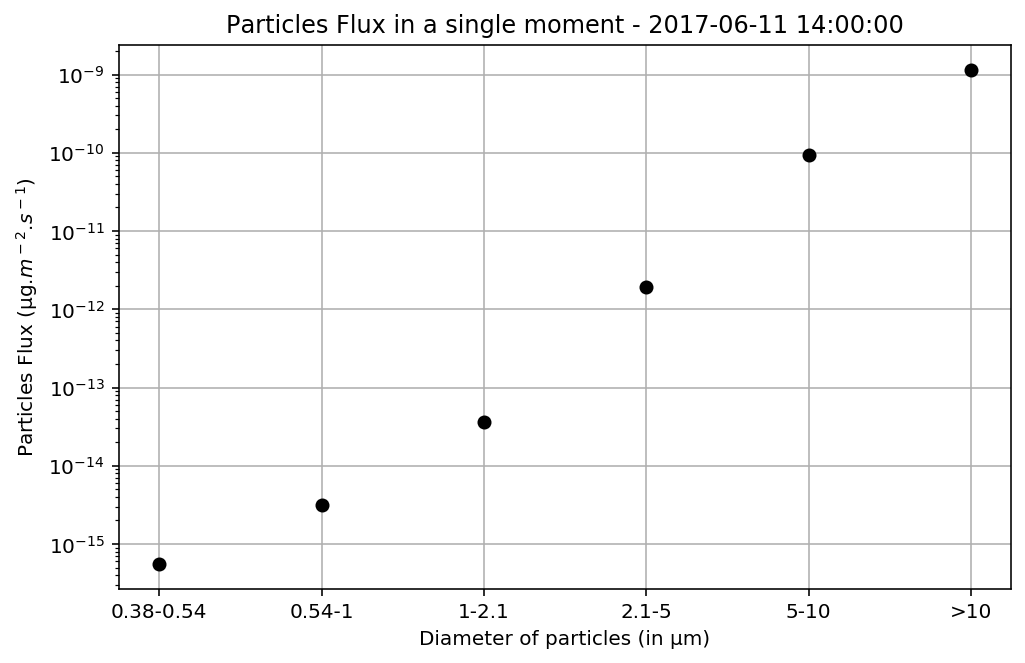

In [51]:
# How to plot the graph for a single moment, s

fig, ax1 = plt.subplots(figsize=(8, 5), dpi=144)
plt.rcParams['figure.figsize'] = [18, 9]
x=s.index
y=s.values
ax1.plot(x, y, 'o', color='black')
ax1.set_title('Particles Flux in a single moment - 2017-06-11 14:00:00')
ax1.set_xlabel('Diameter of particles (in μm)')
ax1.set_ylabel('Particles Flux (μg.$m^-$$^2$.$s^-$$^1$)')

# How to use a log-scale for y-axis:
ax1.set_yscale('log')

# Scientific notation for the y-axis:


ax1.tick_params(axis='x', labelsize=10)
ax1.grid(True)
  
# To save the figure
plt.savefig('Fig1 - Particles flux in a single moment @ '+ name)

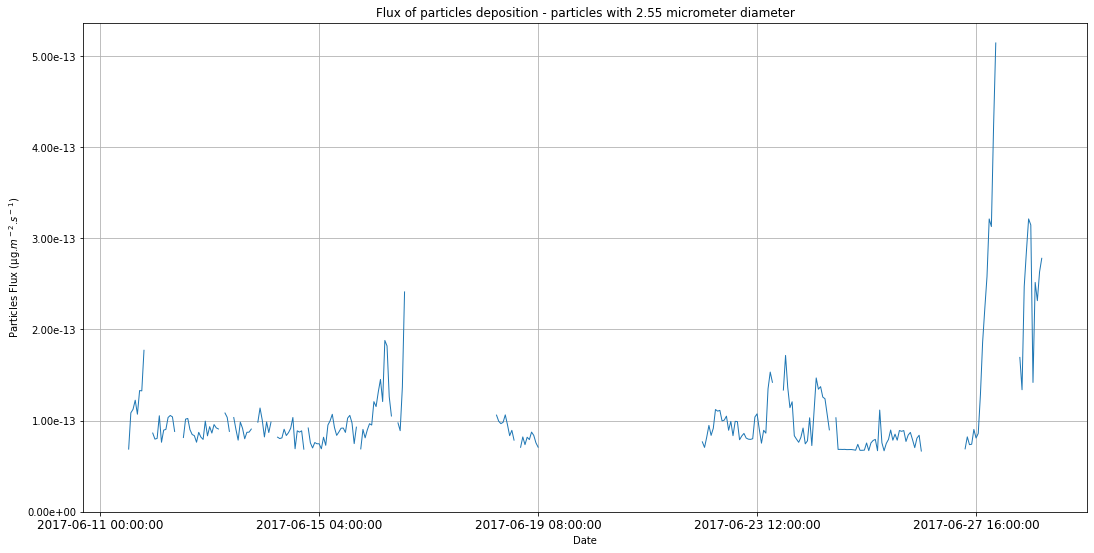

In [52]:
# Plot of the time series of Flux data:

# Bigger figure
plt.rcParams['figure.figsize'] = [18, 9]
import matplotlib.ticker as mtick

fig1 = Flux['F2.55'].plot(linewidth=1,title ='Flux of particles deposition - particles with 2.55 micrometer diameter');
fig1.set_xlabel('Date')
fig1.set_ylabel('Particles Flux (μg.$m^-$$^2$.$s^-$$^1$)')
fig1.set_ylim(0,)
fig1.tick_params(axis='x', labelsize=12)

fig1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
fig1.grid(True)


# To save the figure
plt.savefig('Fig2 - Particles flux of diameter of 2,55 micrometers @ '+ name)



In [53]:
# To create a collumns plot with mean and standard deviations:

# Create the database for use with mean and sd values:
stats = Flux6.describe()
Tstats = stats.transpose()
Tstats1 = Tstats.reset_index()
Index = Tstats1['Index']
Mean = Tstats1['mean']
Std = Tstats1['std']

stats

Index,,0.38-0.54,0.54-1,1-2.1,2.1-5,5-10,>10,
count,0.0,2.490000e+02,2.490000e+02,2.490000e+02,2.490000e+02,1.990000e+02,7.900000e+01,0.0
mean,NaN,4.020393e-16,3.609823e-15,3.841902e-14,1.754861e-12,6.191838e-11,2.024258e-09,NaN
std,NaN,1.992606e-16,1.736993e-15,2.202668e-14,7.502397e-13,5.055019e-11,2.780950e-09,NaN
min,NaN,1.185533e-16,1.093167e-15,2.505806e-15,6.661985e-14,4.569523e-12,1.882300e-10,NaN
25%,NaN,2.520973e-16,2.464730e-15,2.597794e-14,1.712489e-12,2.093775e-11,2.852849e-10,NaN
50%,NaN,3.720065e-16,3.419569e-15,3.193776e-14,1.825518e-12,5.564482e-11,1.152396e-09,NaN
75%,NaN,4.761390e-16,4.336943e-15,4.104588e-14,1.979200e-12,1.015504e-10,2.731335e-09,NaN
max,NaN,1.456477e-15,1.393619e-14,1.896280e-13,4.655142e-12,2.133274e-10,1.373629e-08,NaN


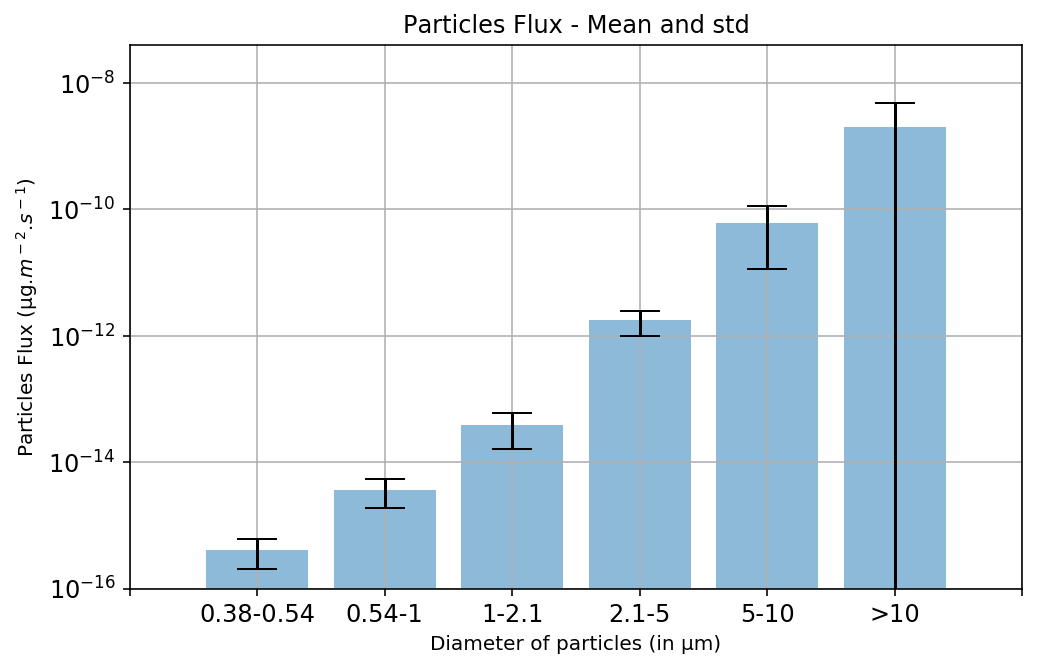

In [54]:
# Build the plot
fig, ax = plt.subplots(figsize=(8, 5), dpi=144)
plt.rcParams['figure.figsize'] = [18, 9]
ax.bar(Index, Mean, yerr=Std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_xticks(Index)
ax.yaxis.grid(True)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))

ax.set_title('Particles Flux - Mean and std')
ax.set_xlabel('Diameter of particles (in μm)')
ax.set_ylabel('Particles Flux (μg.$m^-$$^2$.$s^-$$^1$)')

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid(True)
ax.set_ylim(1e-16,4e-8)
ax.set_yscale('log')

# To save the figure
plt.savefig('Fig3 - Particles flux - Mean and std @ '+ name)

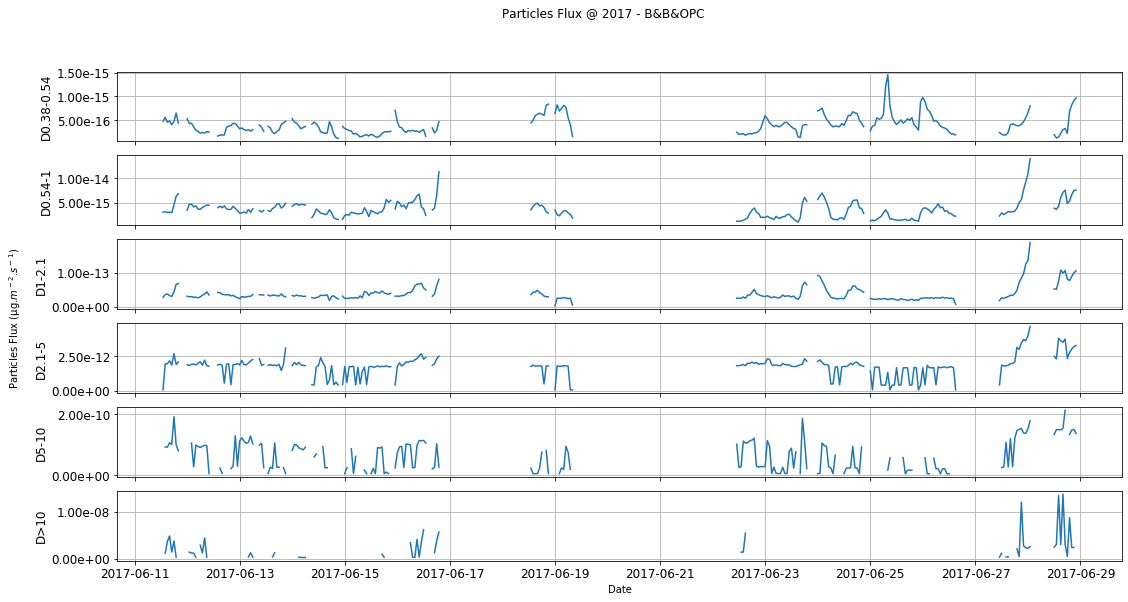

In [55]:
# To correct the timestamp of the database:

dFlux6=Flux6.reset_index()
dFlux6['Date'] = dFlux6['Date'].astype('datetime64')
dFlux6 = dFlux6.set_index('Date')


fig7, (ax6, ax7, ax8, ax9, ax10, ax11) = plt.subplots(6, sharex=True)


fig7.text(0.04, 0.5, 'Particles Flux (μg.$m^-$$^2$.$s^-$$^1$)', va='center', rotation='vertical')

fig7.suptitle('Particles Flux @ ' + name)

import matplotlib.ticker as mtick

ax6.plot(dFlux6['0.38-0.54'])
ax6.set_ylabel('D0.38-0.54', fontsize=12)
ax6.tick_params(axis='x', labelsize=12 )
ax6.tick_params(axis='y', labelsize=12 )
ax6.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax6.grid(True)

ax7.plot(dFlux6['0.54-1'])
ax7.set_ylabel('D0.54-1', fontsize=12)
ax7.tick_params(axis='x', labelsize=12 )
ax7.tick_params(axis='y', labelsize=12 )
ax7.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax7.grid(True)

ax8.plot(dFlux6['1-2.1'])
ax8.set_ylabel('D1-2.1', fontsize=12)
ax8.tick_params(axis='x', labelsize=12 )
ax8.tick_params(axis='y', labelsize=12 )
ax8.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax8.grid(True)

ax9.plot(dFlux6['2.1-5'])
ax9.set_ylabel('D2.1-5', fontsize=12)
ax9.tick_params(axis='x', labelsize=12 )
ax9.tick_params(axis='y', labelsize=12 )
ax9.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax9.grid(True)

ax10.plot(dFlux6['5-10'])
ax10.set_ylabel('D5-10', fontsize=12)
ax10.tick_params(axis='x', labelsize=12 )
ax10.tick_params(axis='y', labelsize=12 )
ax10.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax10.grid(True)

ax11.plot(dFlux6['>10'])
ax11.set_ylabel('D>10', fontsize=12)
ax11.tick_params(axis='x', labelsize=12 )
ax11.tick_params(axis='y', labelsize=12 )
ax11.set_xlabel('Date')
ax11.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax11.grid(True)

# To save the figure
plt.savefig('Fig4 - Particles Flux @ ' + name)

In [56]:
# Create Particles Flux plot with mean and std (considering NaN as zero values)

In [57]:
# dFlux6 is the database with the Date in the correct format to display the plots:

dFlux6

Index,,0.38-0.54,0.54-1,1-2.1,2.1-5,5-10,>10,
Date,,,,,,,,
2017-06-11 13:00:00,NaN,4.764118e-16,3.115405e-15,2.799421e-14,6.876516e-14,NaN,NaN,NaN
2017-06-11 14:00:00,NaN,5.578463e-16,3.178677e-15,3.636223e-14,1.935226e-12,9.255053e-11,1.152396e-09,NaN
2017-06-11 15:00:00,NaN,4.566265e-16,3.056529e-15,3.811370e-14,1.955604e-12,9.200438e-11,3.642834e-09,NaN
2017-06-11 16:00:00,NaN,4.830887e-16,3.110083e-15,3.330069e-14,2.170581e-12,1.060985e-10,4.795018e-09,NaN
2017-06-11 17:00:00,NaN,4.026239e-16,3.003758e-15,3.064191e-14,1.857607e-12,1.009142e-10,1.359267e-09,NaN
...,...,...,...,...,...,...,...,...
2017-06-28 18:00:00,NaN,2.230789e-16,4.847074e-15,8.165407e-14,2.331291e-12,NaN,4.549261e-10,NaN
2017-06-28 19:00:00,NaN,6.823493e-16,5.359797e-15,7.755082e-14,2.767152e-12,1.336343e-10,8.677956e-09,NaN
2017-06-28 20:00:00,NaN,8.211003e-16,6.657458e-15,8.962691e-14,3.017664e-12,1.480564e-10,2.348420e-09,NaN


In [58]:
Flux7 = dFlux6.fillna(0)
Flux7

Index,,0.38-0.54,0.54-1,1-2.1,2.1-5,5-10,>10,
Date,,,,,,,,
2017-06-11 13:00:00,0.0,4.764118e-16,3.115405e-15,2.799421e-14,6.876516e-14,0.000000e+00,0.000000e+00,0.0
2017-06-11 14:00:00,0.0,5.578463e-16,3.178677e-15,3.636223e-14,1.935226e-12,9.255053e-11,1.152396e-09,0.0
2017-06-11 15:00:00,0.0,4.566265e-16,3.056529e-15,3.811370e-14,1.955604e-12,9.200438e-11,3.642834e-09,0.0
2017-06-11 16:00:00,0.0,4.830887e-16,3.110083e-15,3.330069e-14,2.170581e-12,1.060985e-10,4.795018e-09,0.0
2017-06-11 17:00:00,0.0,4.026239e-16,3.003758e-15,3.064191e-14,1.857607e-12,1.009142e-10,1.359267e-09,0.0
...,...,...,...,...,...,...,...,...
2017-06-28 18:00:00,0.0,2.230789e-16,4.847074e-15,8.165407e-14,2.331291e-12,0.000000e+00,4.549261e-10,0.0
2017-06-28 19:00:00,0.0,6.823493e-16,5.359797e-15,7.755082e-14,2.767152e-12,1.336343e-10,8.677956e-09,0.0
2017-06-28 20:00:00,0.0,8.211003e-16,6.657458e-15,8.962691e-14,3.017664e-12,1.480564e-10,2.348420e-09,0.0


In [59]:
# Create the database for use with mean and sd values:
stats0 = Flux7.describe()
Tstats0 = stats0.transpose()
Tstats2 = Tstats0.reset_index()
Index0 = Tstats2['Index']
Mean0 = Tstats2['mean']
Std0 = Tstats2['std']

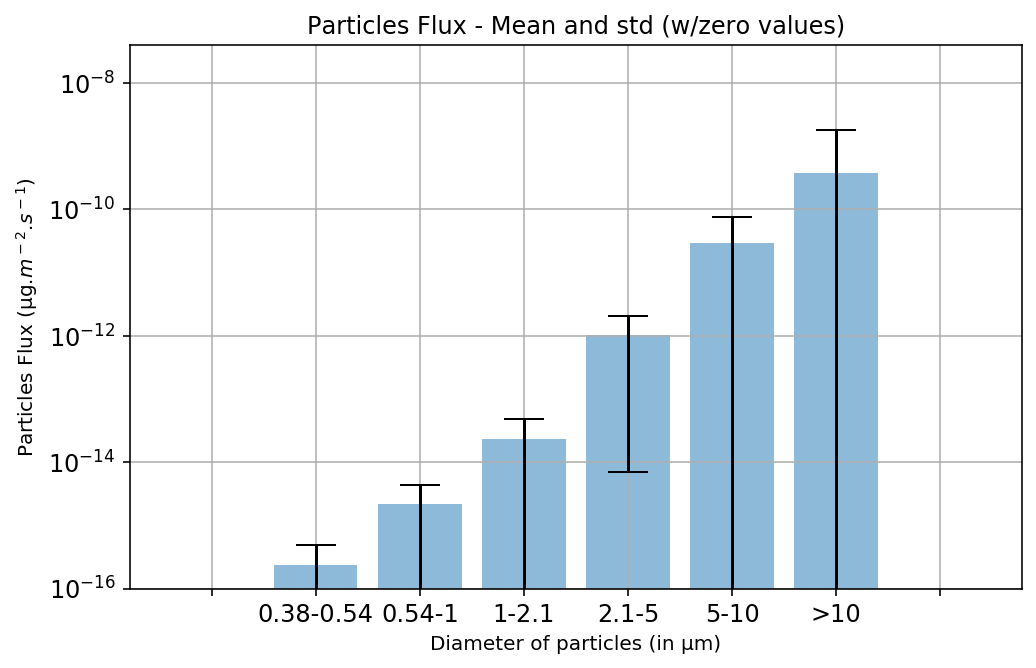

In [60]:
# Build the plot
fig, ax = plt.subplots(figsize=(8, 5), dpi=144)
plt.rcParams['figure.figsize'] = [18, 9]
ax.bar(Index0, Mean0, yerr=Std0, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_xticks(Index0)
ax.yaxis.grid(True)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))

ax.set_title('Particles Flux - Mean and std (w/zero values)')
ax.set_xlabel('Diameter of particles (in μm)')
ax.set_ylabel('Particles Flux (μg.$m^-$$^2$.$s^-$$^1$)')

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid(True)
ax.set_ylim(1e-16,4e-8)
ax.set_yscale('log')

# To save the figure
plt.savefig('Fig3B - Particles flux - Mean and std - zero values @ '+ name)

In [61]:
Std0

0    0.000000e+00
1    2.502708e-16
2    2.222673e-15
3    2.539462e-14
4    1.038369e-12
5    4.660353e-11
6    1.440889e-09
7    0.000000e+00
Name: std, dtype: float64

In [62]:
stats0

Index,,0.38-0.54,0.54-1,1-2.1,2.1-5,5-10,>10,
count,418.0,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,418.0
mean,0.0,2.394923e-16,2.150349e-15,2.288597e-14,1.045360e-12,2.947789e-11,3.825751e-10,0.0
std,0.0,2.502708e-16,2.222673e-15,2.539462e-14,1.038369e-12,4.660353e-11,1.440889e-09,0.0
min,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,0.0,2.187634e-16,1.947589e-15,2.505286e-14,1.056755e-12,0.000000e+00,0.000000e+00,0.0
75%,0.0,4.028089e-16,3.702191e-15,3.344068e-14,1.870107e-12,2.817566e-11,0.000000e+00,0.0
max,0.0,1.456477e-15,1.393619e-14,1.896280e-13,4.655142e-12,2.133274e-10,1.373629e-08,0.0


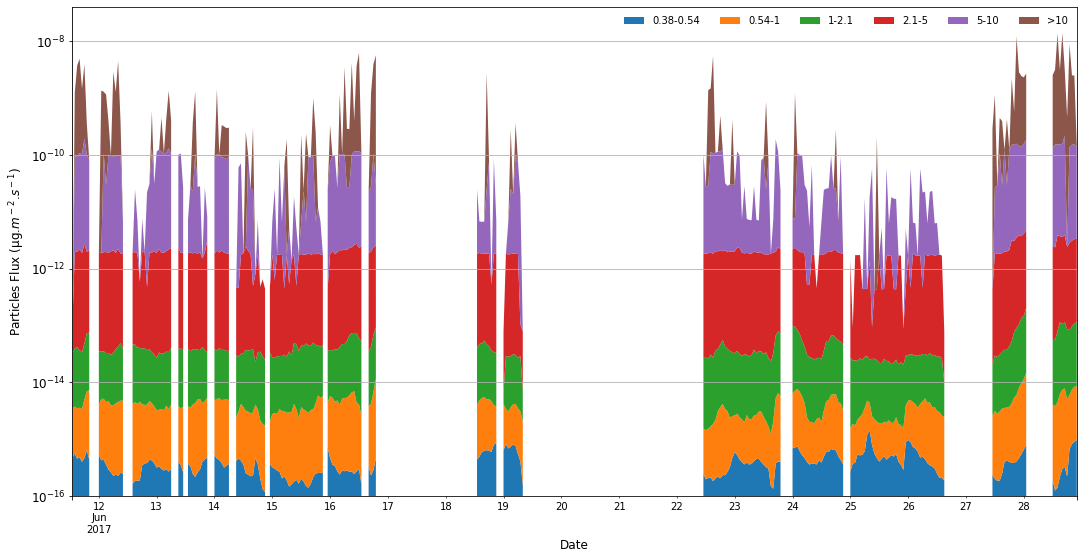

In [63]:
# To created the stacked plot of integrated fluxes


fig5 = dFlux6[['0.38-0.54','0.54-1','1-2.1','2.1-5','5-10','>10']].plot.area(linewidth=0)
fig5.set_xlabel('Date',fontsize=12)
fig5.set_ylabel('Particles Flux (μg.$m^-$$^2$.$s^-$$^1$)', fontsize=12)
fig5.grid(True)
fig5.legend(title='Particle size')
fig5.tick_params(axis='x', labelsize=12 )
fig5.tick_params(axis='y', labelsize=12 )
fig5.legend(frameon=False, ncol=6)

fig5.set_ylim(1e-16,4e-8)
fig5.set_yscale('log')

plt.savefig('Fig5 - Particle Fluxes during monitoring period stacked @ ' + name)

In [64]:
# Prepare the weather database:

In [65]:
Weatherdata = data[['T','RH','WS','WD']]
Weatherdata

,T,RH,WS,WD
Date,,,,
2017-06-11 00:00:00,1.62,74.0,6.91,154.816667
2017-06-11 01:00:00,1.80,71.6,8.38,163.183333
2017-06-11 02:00:00,1.61,70.8,7.77,170.683333
2017-06-11 03:00:00,1.50,71.6,7.98,170.100000
2017-06-11 04:00:00,1.03,75.4,8.63,168.750000
...,...,...,...,...
2017-06-28 18:00:00,1.46,84.6,3.04,137.750000
2017-06-28 19:00:00,1.40,84.6,3.00,131.283333
2017-06-28 20:00:00,1.46,84.1,3.08,132.950000


In [66]:
Weatherdata1=Weatherdata.reset_index()
Weatherdata1.dtypes

Date     object
T       float64
RH      float64
WS      float64
WD      float64
dtype: object

In [67]:
Weatherdata1['Date'] = Weatherdata1['Date'].astype('datetime64')

In [68]:
Weatherdata1.dtypes

Date    datetime64[ns]
T              float64
RH             float64
WS             float64
WD             float64
dtype: object

In [69]:
Weatherdata2 = Weatherdata1.set_index('Date')
Weatherdata2

,T,RH,WS,WD
Date,,,,
2017-06-11 00:00:00,1.62,74.0,6.91,154.816667
2017-06-11 01:00:00,1.80,71.6,8.38,163.183333
2017-06-11 02:00:00,1.61,70.8,7.77,170.683333
2017-06-11 03:00:00,1.50,71.6,7.98,170.100000
2017-06-11 04:00:00,1.03,75.4,8.63,168.750000
...,...,...,...,...
2017-06-28 18:00:00,1.46,84.6,3.04,137.750000
2017-06-28 19:00:00,1.40,84.6,3.00,131.283333
2017-06-28 20:00:00,1.46,84.1,3.08,132.950000


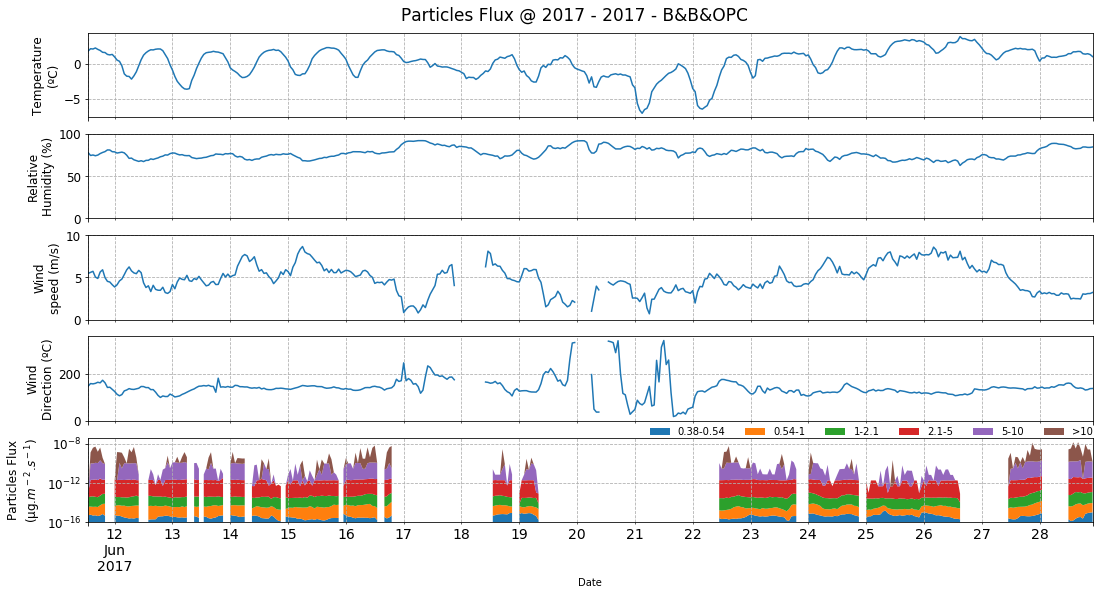

In [70]:
import matplotlib.ticker as mtick
import numpy as np

fig6a, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True)
fig6a.suptitle('Particles Flux @ 2017 - ' + name, y=0.92,fontsize=17)

# To define the data for the plots (and which type):
Weatherdata2['T'].plot(ax = ax1)
Weatherdata2['RH'].plot(ax = ax2)
Weatherdata2['WS'].plot(ax = ax3)
Weatherdata2['WD'].plot(ax = ax4)
dFlux6[['0.38-0.54','0.54-1','1-2.1','2.1-5','5-10','>10']].plot(kind='area', ax=ax5,fontsize=14, linewidth=0)

# Set up the 1st plot (ax1):
ax1.set_ylabel('Temperature\n(ºC)', fontsize=12)
ax1.tick_params(axis='x', labelsize=12 )
ax1.tick_params(axis='y', labelsize=12 )
ax1.grid(True)
ax1.grid(axis='both', which='both', linestyle='--')

# Set up the 2nd plot (ax2):
ax2.set_ylabel('Relative\nHumidity (%)', fontsize=12)
ax2.set_ylim(0,100)
ax2.tick_params(axis='x', labelsize=12 )
ax2.tick_params(axis='y', labelsize=12 )
ax2.grid(axis='both', which='both', linestyle='--')

# Set up the 3rd plot (ax3):
ax3.set_ylabel('Wind\nspeed (m/s)', fontsize=12)
ax3.set_ylim(0,10)
ax3.tick_params(axis='x', labelsize=10 )
ax3.tick_params(axis='y', labelsize=12 )
ax3.grid(axis='both', which='both', linestyle='--')

# Set up the 4th plot (ax4):
ax4.set_ylabel('Wind\nDirection (ºC)', fontsize=12)
ax4.set_ylim(0,360)
plt.yticks(np.arange(0,361,90))
ax4.tick_params(axis='x', labelsize=10 )
ax4.tick_params(axis='y', labelsize=12 )
ax4.grid(axis='both', which='both', linestyle='--')

# Set up the 5th plot (ax5)
ax5.set_ylabel('Particles Flux\n(μg.$m^-$$^2$.$s^-$$^1$)', fontsize=12)
ax5.tick_params(axis='y', labelsize=12 )
ax5.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax5.set_ylim(1e-16,4e-8)
ax5.set_yscale('log')
ax5.grid(axis='both', which='both', linestyle='--')
ax5.legend(frameon=False, ncol=6, bbox_to_anchor=(0.55, 0.90))

# To save the figure
plt.savefig('Fig6a - Particles Flux & WD @ ' + name)

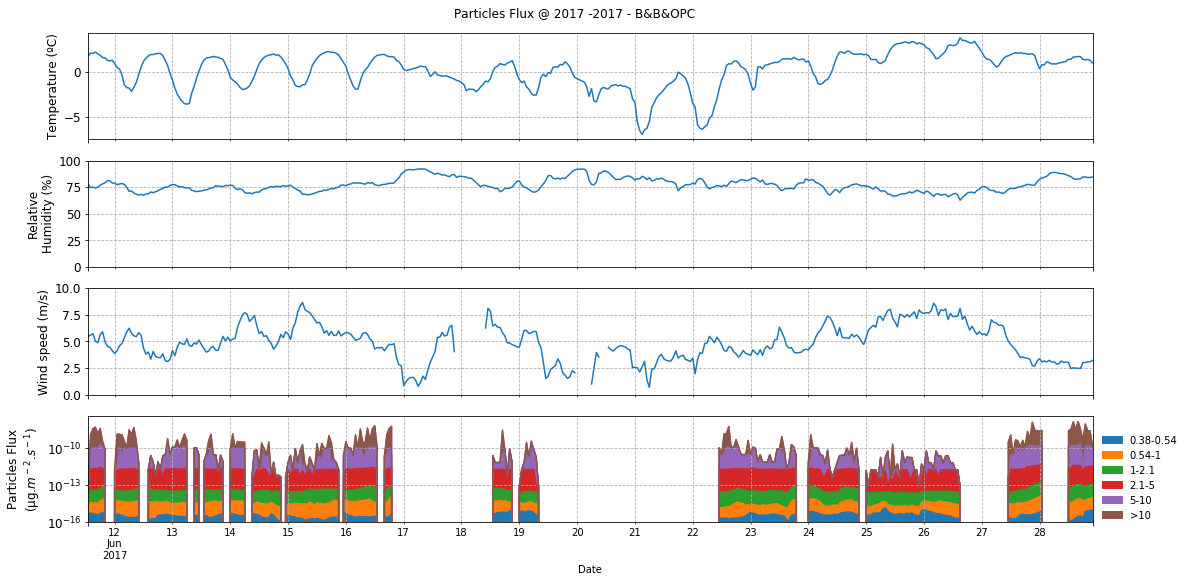

In [71]:
import matplotlib.ticker as mtick

fig6b, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
fig6b.suptitle('Particles Flux @ 2017 -' + name, y=0.92)

# To define the data for the plots (and which type):
Weatherdata2['T'].plot(ax = ax1)
Weatherdata2['RH'].plot(ax = ax2)
Weatherdata2['WS'].plot(ax = ax3)
dFlux6[['0.38-0.54','0.54-1','1-2.1','2.1-5','5-10','>10']].plot(kind='area', ax=ax4)

# Set up the 1st plot (ax1):
ax1.set_ylabel('Temperature (ºC)', fontsize=12)
ax1.tick_params(axis='x', labelsize=12 )
ax1.tick_params(axis='y', labelsize=12 )
ax1.grid(True)
ax1.grid(axis='both', which='both', linestyle='--')

# Set up the 2nd plot (ax2):
ax2.set_ylabel('Relative\nHumidity (%)', fontsize=12)
ax2.set_ylim(0,100)
ax2.tick_params(axis='x', labelsize=12 )
ax2.tick_params(axis='y', labelsize=12 )
ax2.grid(axis='both', which='both', linestyle='--')

# Set up the 3rd plot (ax3):
ax3.set_ylabel('Wind speed (m/s)', fontsize=12)
ax3.set_ylim(0,10)
ax3.tick_params(axis='x', labelsize=10 )
ax3.tick_params(axis='y', labelsize=12 )
ax3.grid(axis='both', which='both', linestyle='--')

# Set up the 4th plot (ax4)
ax4.set_ylabel('Particles Flux\n(μg.$m^-$$^2$.$s^-$$^1$)', fontsize=12)
ax4.tick_params(axis='x', labelsize=12 )
ax4.tick_params(axis='y', labelsize=12 )
ax4.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax4.set_ylim(1e-16,4e-8)
ax4.set_yscale('log')
ax4.grid(axis='both', which='both', linestyle='--')
ax4.legend(frameon=False, ncol=1, bbox_to_anchor=(1, 0.9))

# To save the figure
plt.savefig('Fig6b - Particles Flux & WD @ ' + name)

In [72]:
# How to evaluate correlations between fluxes and weather data?

In [73]:
Tflux4 =  Tflux3.set_index('Index')
Flux4 = Tflux4.transpose()
Flux4

Index,0.38-0.54,0.54-1,1-2.1,2.1-5,5-10,>10
Date,,,,,,
2017-06-11 13:00:00,4.764118e-16,3.115405e-15,2.799421e-14,6.876516e-14,NaN,NaN
2017-06-11 14:00:00,5.578463e-16,3.178677e-15,3.636223e-14,1.935226e-12,9.255053e-11,1.152396e-09
2017-06-11 15:00:00,4.566265e-16,3.056529e-15,3.811370e-14,1.955604e-12,9.200438e-11,3.642834e-09
2017-06-11 16:00:00,4.830887e-16,3.110083e-15,3.330069e-14,2.170581e-12,1.060985e-10,4.795018e-09
2017-06-11 17:00:00,4.026239e-16,3.003758e-15,3.064191e-14,1.857607e-12,1.009142e-10,1.359267e-09
...,...,...,...,...,...,...
2017-06-28 18:00:00,2.230789e-16,4.847074e-15,8.165407e-14,2.331291e-12,NaN,4.549261e-10
2017-06-28 19:00:00,6.823493e-16,5.359797e-15,7.755082e-14,2.767152e-12,1.336343e-10,8.677956e-09
2017-06-28 20:00:00,8.211003e-16,6.657458e-15,8.962691e-14,3.017664e-12,1.480564e-10,2.348420e-09


In [74]:
# Merge both datasets
Final_data = pd.merge(Flux4, Weatherdata, on='Date')
Final_data

,0.38-0.54,0.54-1,1-2.1,2.1-5,5-10,>10,T,RH,WS,WD
Date,,,,,,,,,,
2017-06-11 13:00:00,4.764118e-16,3.115405e-15,2.799421e-14,6.876516e-14,NaN,NaN,1.84,77.9,5.47,147.916667
2017-06-11 14:00:00,5.578463e-16,3.178677e-15,3.636223e-14,1.935226e-12,9.255053e-11,1.152396e-09,2.17,74.5,5.59,158.900000
2017-06-11 15:00:00,4.566265e-16,3.056529e-15,3.811370e-14,1.955604e-12,9.200438e-11,3.642834e-09,2.13,75.1,5.72,157.450000
2017-06-11 16:00:00,4.830887e-16,3.110083e-15,3.330069e-14,2.170581e-12,1.060985e-10,4.795018e-09,2.28,74.2,5.04,159.716667
2017-06-11 17:00:00,4.026239e-16,3.003758e-15,3.064191e-14,1.857607e-12,1.009142e-10,1.359267e-09,2.08,75.0,4.87,164.383333
...,...,...,...,...,...,...,...,...,...,...
2017-06-28 18:00:00,2.230789e-16,4.847074e-15,8.165407e-14,2.331291e-12,NaN,4.549261e-10,1.46,84.6,3.04,137.750000
2017-06-28 19:00:00,6.823493e-16,5.359797e-15,7.755082e-14,2.767152e-12,1.336343e-10,8.677956e-09,1.40,84.6,3.00,131.283333
2017-06-28 20:00:00,8.211003e-16,6.657458e-15,8.962691e-14,3.017664e-12,1.480564e-10,2.348420e-09,1.46,84.1,3.08,132.950000


In [75]:
# To plot Spearman correlations

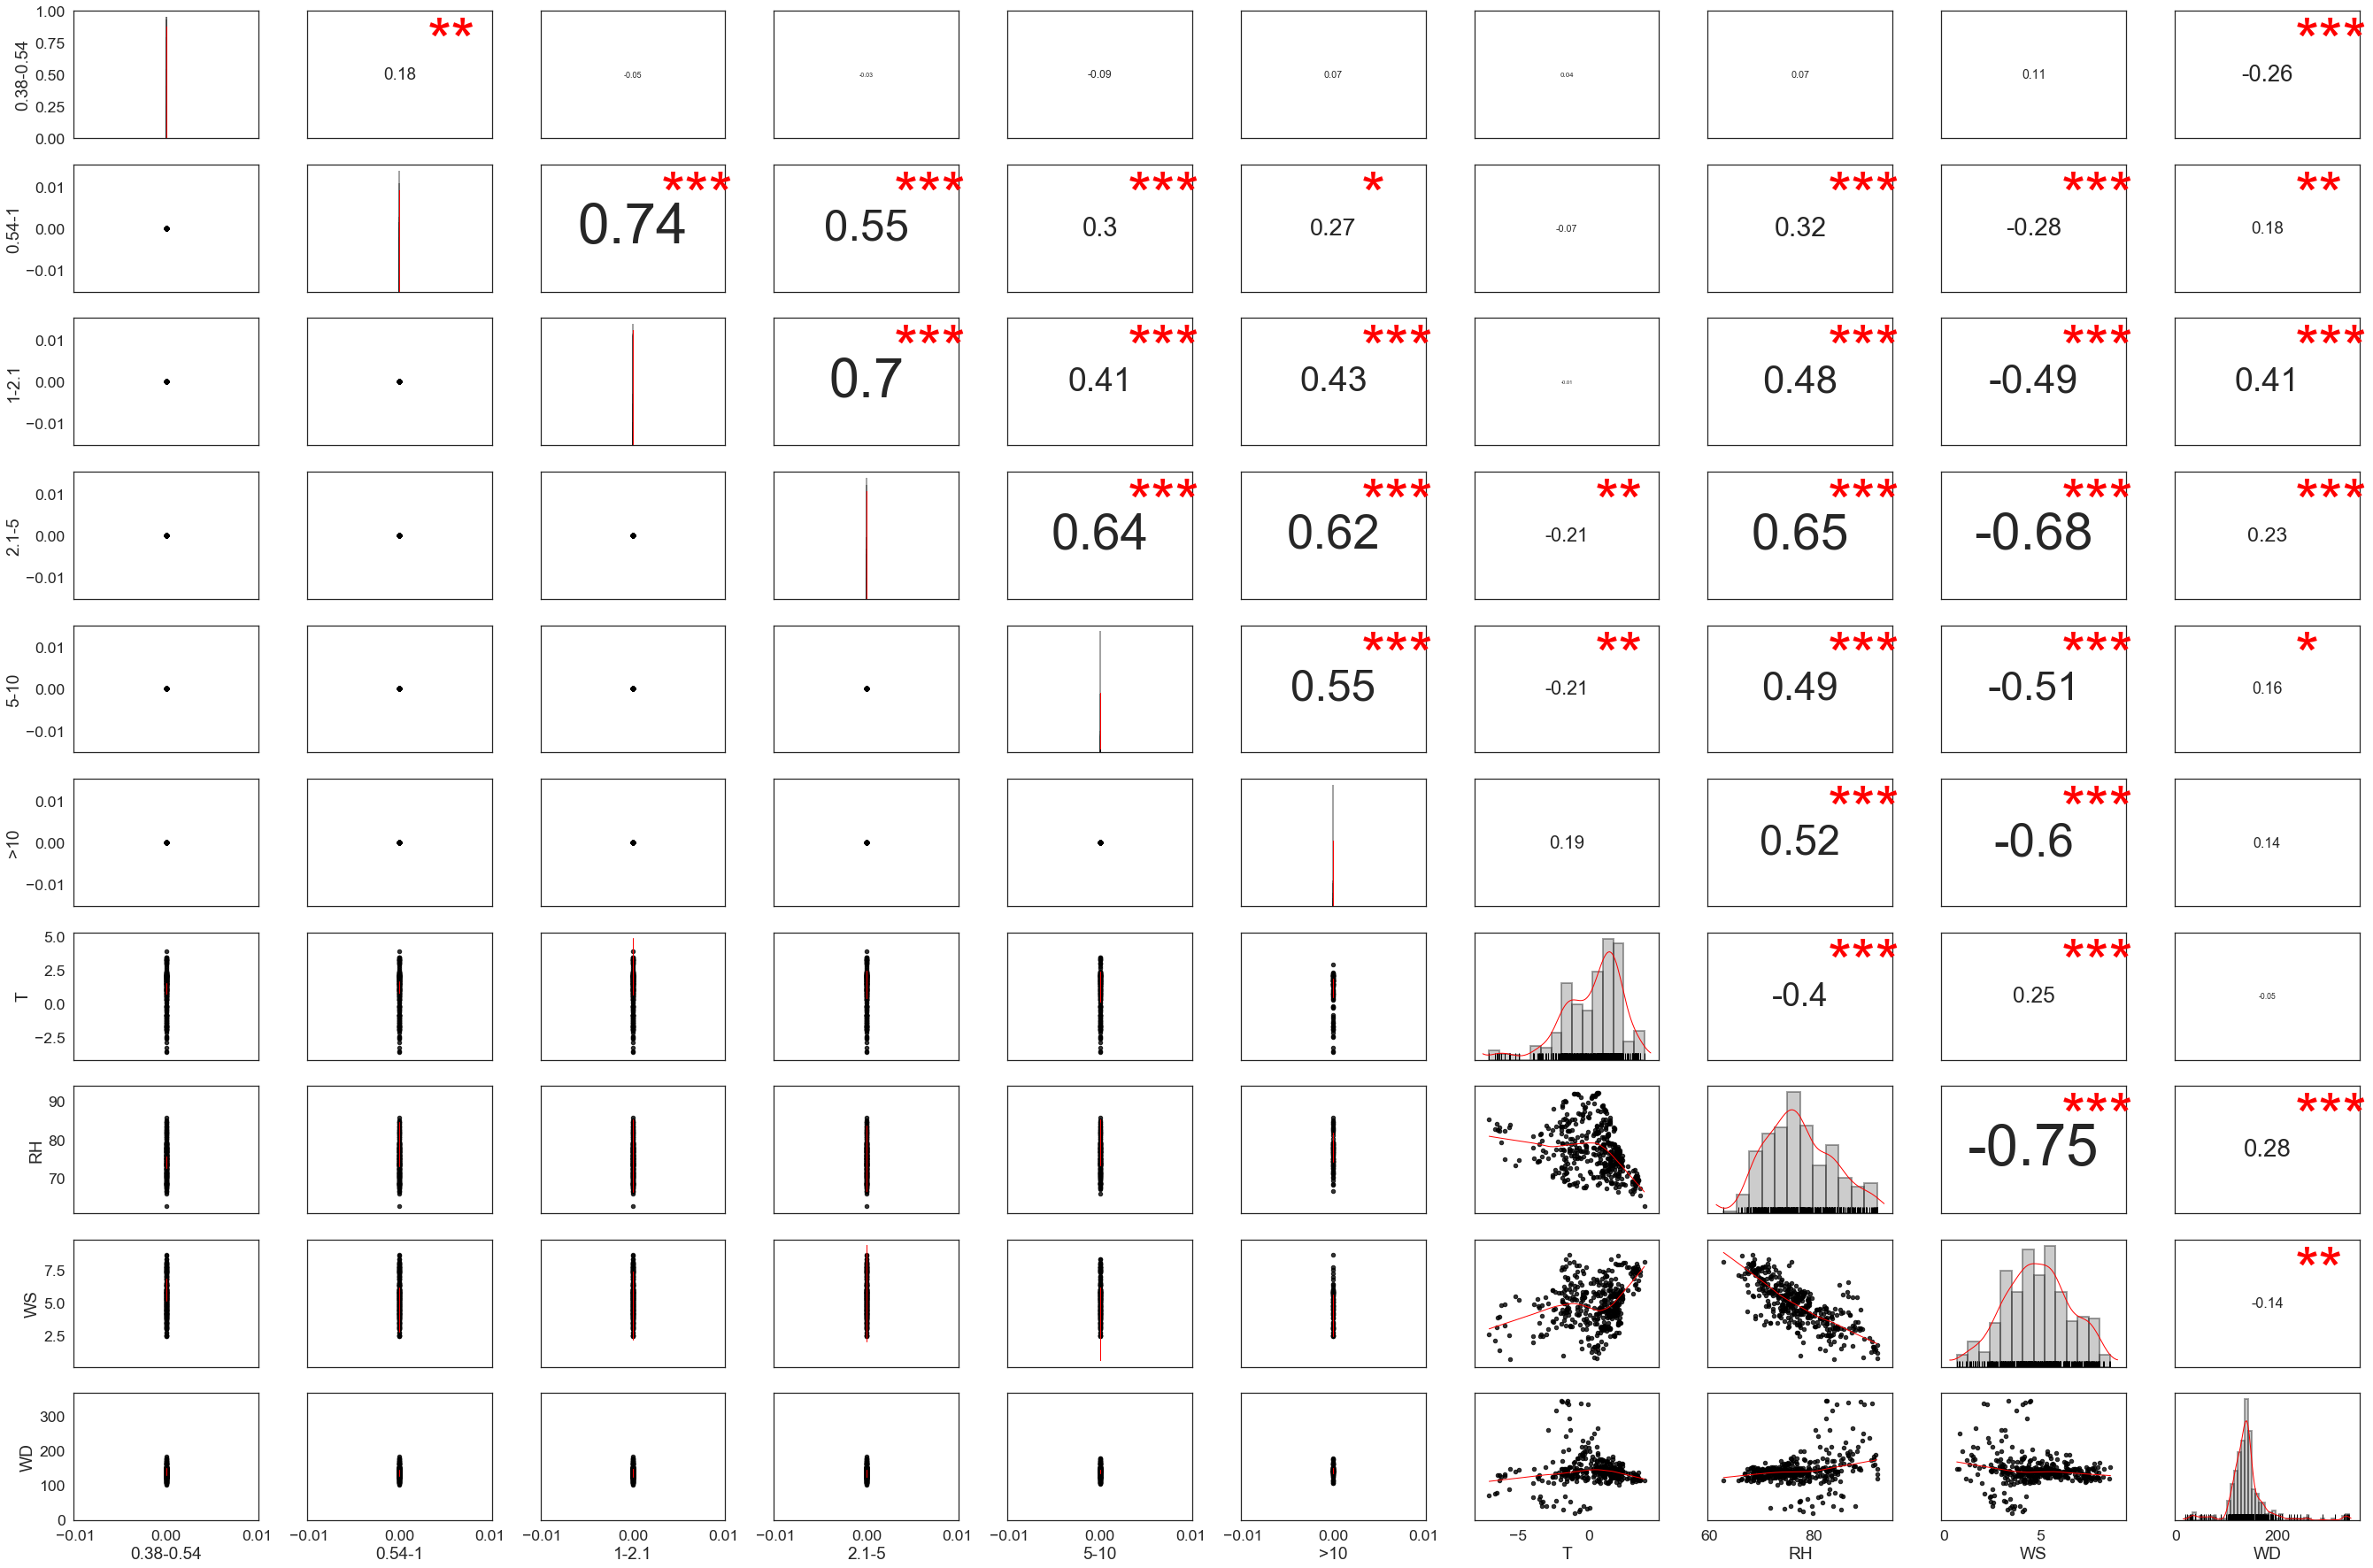

In [76]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'spearman')
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    font_size = abs(corr_r) * 80 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

def corrfunc(x, y, **kws):
    r, p = stats.spearmanr(x, y)
    p_stars = ''
    if p <= 0.05:
        p_stars = '*'
    if p <= 0.01:
        p_stars = '**'
    if p <= 0.001:
        p_stars = '***'
    ax = plt.gca()
    ax.annotate(p_stars, xy=(0.65, 0.6), xycoords=ax.transAxes,
                color='red', fontsize=70)

sns.set(style='white', font_scale=1.6)

g = sns.PairGrid(Final_data, aspect=1.5, diag_sharey=False, despine=False)
g.map_lower(sns.regplot, lowess=True, ci=False,
            line_kws={'color': 'red', 'lw': 1},
            scatter_kws={'color': 'black', 's': 20})
g.map_diag(sns.distplot, color='black',
           kde_kws={'color': 'red', 'cut': 0.7, 'lw': 1},
           hist_kws={'histtype': 'bar', 'lw': 2,
                     'edgecolor': 'k', 'facecolor':'grey'})
g.map_diag(sns.rugplot, color='black')
g.map_upper(corrdot)
g.map_upper(corrfunc)
g.fig.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()

plt.savefig('Fig7 - Spearman correlations between Fluxes and weather data')

In [77]:
# To save the final dataset of Flux and weather data:

selection = Final_data

output_selection = 'Flux & weather data.csv'

# Save dataframe to csv
selection.to_csv(output_selection, sep=',', index = True)